In [1]:
import numpy
import matplotlib
import sklearn

In [2]:
import csv
import time
import random
import sys

In [3]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd	

In [4]:
import nltk
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [5]:
import heapq
import math
from importlib import reload
from operator import itemgetter
import statistics

## Important files

In [6]:
def file_size(input_file):
    with open(input_file, 'r', encoding = 'utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        i = 0
        for row in rder:
            i+=1
        print(i)

In [7]:
def print_first_n(n, some_obj):
    c = 0
    for x in some_obj:
        c += 1
        if (c <= n):
            print(x + " ")

In [8]:
def get_sample_line(input_file, k=2):
    with open(input_file, 'r', encoding = 'utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        i = 0
        for row in rder:
            i+=1
            print(row)
            if (i > k):
                break

In [9]:
urls_file = 'urls.csv'
friends_file = 'friends.csv'
panel_file = '../__big__/__cached__/panel.csv'

domains_file = 'domains_full.csv'
sources_file = 'sources_t2.csv'
nodes_file = 'nodes_t2.csv'

#keeping some data reserved for a future, larger test
domains_training_file1 = 'domains_partial_t1.csv'
sources_training_file1 = 'sources_partial_t1.csv'
nodes_training_file1 = 'nodes_partial_t1.csv'

#FILE DESCRIPTIONS

#urls file = every tweet
#friends file = every friend each panel member has (gender, location listed are for user in panel, not user's friend)
#panel file = panel member full stats

#domains file = every domain labeled
#sources file = urls file with less information, color labels added, and certain non-political urls removed
#nodes file = every interaction between a user and a url in sources file, classified

#"training" files

In [10]:
get_sample_line(urls_file, 0)

{'': '1', 'user_id': '12', 'website': 'blog.twitter.com', 'tweet_id': '780809833402470400', 'tweet_date': 'Tue Sep 27 16:42:25 +0000 2016', 'retweet_prefix': 'RT @twitter:', 'tweet_text': 'Twitter is helping you register to vote! Send a Direct Message to @gov to get started: https://t.co/1DgGG9i71o https://t.co/shckBNcT3l', 'quoted_text': '', 'retweet_of_tweet_id': '780809477754789888', 'retweet_of_user_id': '783214', 'quote_of_tweet_id': 'NA', 'quote_of_user_name': '', 'reply_to_tweet_id': 'NA', 'candidate_interaction': '', 'where_url_found': 'retweeted', 'who_url_from': 'twitter', 'link_type': 'external', 'shortened_url': 'https://t.co/1DgGG9i71o', 'canonical_url': 'https://blog.twitter.com/official/en_us/a/2016/get-registered-to-vote-with-gov.html', 'title': 'Get Registered to Vote with @Gov', 'date_published': '', 'description': '', 'author': '', 'political_classifier_score': '0.995818855124211', 'ts_tzoffset': '0', 'ts': '2016-09-27 12:42:25', 'ts_month': '9', 'ts_rel_days': '-42'

In [11]:
get_sample_line(friends_file, 0)

{'': '1', 'panel_uid': '5806', 'friend_uid': '148468442', 'age': '38.6799954431533', 'sex': 'Female', 'party': 'Democrat', 'race_ethnicity': 'Caucasian', 'state_code': 'CA'}


In [12]:
get_sample_line(panel_file, 0)

{'user_id': '5806', 'fips': '6083', 'state': 'CA', 'personid': '137481394', 'twProfileName': 'Desiree Fegette', 'twProfileHandle': 'desmiceli', 'twProfileLoc': 'Carpinteria, CA', 'state_code': 'CA', 'first_name': 'DESIREE', 'last_name': 'FEGETTE', 'birth_date': '1978-02-14', 'sex': 'Female', 'ethnicity_code': 'W', 'ethnicity_subgroup': '', 'ethnicity_source': 'model', 'phone_number': '5105363804', 'phone_type': 'L', 'media_market_name': 'Santa Barbara-Santa Maria, CA', 'media_market_id': '269', 'us_house_district': '24', 'reg_address_street1': '4578 4th St Apt C', 'reg_address_street2': '', 'reg_address_city': 'Carpinteria', 'reg_address_state': 'CA', 'reg_address_zip5': '93013', 'reg_address_zip4': '2201', 'reg_address_countyfips': '83', 'reg_address_lat': '34.3991581361', 'reg_address_long': '-119.52616365', 'mailing_address_street1': '', 'mailing_address_street2': '', 'mailing_address_city': '', 'mailing_address_state': '', 'mailing_address_zip5': '0', 'mailing_address_zip4': '0', '

In [13]:
get_sample_line(domains_file, 0)

{'': '1', 'domain': '100percentfedup.com', 'domain_color': 'Red'}


In [14]:
get_sample_line(sources_file, 0)

{'user_id': '12', 'domain': 'sacbee.com', 'label': 'GY'}


In [15]:
get_sample_line(nodes_file, 100)

{'user_id': '788253393877737472', 'domain': 'abc7ny.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'abcnews.go.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'elle.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'iwillvote.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnews.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnews.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnews.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnewyork.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'newyorker.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'newyorker.com', 'label': 'GY', 

## Make appropriate files

In [16]:
def get_url_domain(url):
    prefixes = ['https', 'http', '://', 'www.']
    for p in prefixes:
        if (p == url[:len(p)]):
            url=url[len(p):]
    return url.split('/')[0]

In [17]:
def get_label_dict(domains_file=domains_file):
    input_file = domains_file
    domains_dict = {}
    with open(input_file, 'r', encoding='utf-8') as csvfile:
        rder = csv.DictReader(csvfile)
        for row in rder:
            domains_dict[row['domain']] = row['domain_color']
    return domains_dict

In [18]:
#Interesting Statistics
doms_not_in_file = 0 #domains in urls_file but not domains_file (bc domains_file is a small subset)
distinct_domains = set() #all domains in urls_file
doms_in_sources_file = set() #domains in sources_file (fewer than domains_file bc non political urls, etc taken out)

In [19]:
#combine user posts with domain labels
def make_sources_data(domains_file=domains_file, sources_file=sources_file): 
    global urls_file
    
    #to track interesting statistics
    global distinct_domains, doms_not_in_file, doms_in_sources_file
    domains_dict = get_label_dict(domains_file)
    input_file = urls_file
    output_file = sources_file

    with open(input_file, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        with open(output_file, 'w') as csvfile2:
            h=['user_id', 'domain', 'label', 'timestamp'] #edited
            wrter = csv.DictWriter(csvfile2, fieldnames=h)
            wrter.writeheader()
            for row in rder:
                domain = get_url_domain(row['canonical_url'])
                
                if (domain not in distinct_domains): #stats tracking
                    distinct_domains.add(domain)
                    if (domain not in domains_dict):
                        doms_not_in_file+=1
                        
                #273 fewer domains in sources_file as compared to domains_file due to this (quite necessary) line
                if (not row['is_pol_news_site']) or ('twitter' in domain) or (not domain in domains_dict):
                    continue
                if (not row['is_panel_member']):
                    continue
                doms_in_sources_file.add(domain) #stats tracking
                wrter.writerow({h[0]:row['user_id'],h[1]:domain,h[2]:domains_dict[domain], h[3]:row['ts']}) #edited
#Note: the simplified ids assigned later on have GYs exclusively first, perhaps due to some GY domains being present in large number?

In [20]:
#make_sources_data(sources_file='sources_data_ts.csv') #to make timestamp data, specifically for temporal analysis

In [21]:
#make_sources_data() #5 mins to run (once output_file exists, never needs to be run again)

In [22]:
#I haven't run make_sources_data() this time through, so 0, 0, 0 is the expected answer
print(doms_not_in_file, len(distinct_domains), len(doms_in_sources_file))

0 0 0


In [344]:
get_sample_line(sources_file, 1)

{'user_id': '12', 'domain': 'sacbee.com', 'label': 'GY'}
{'user_id': '12', 'domain': 'washingtonpost.com', 'label': 'GY'}


In [23]:
def make_nodes_data(sources_file=sources_file, nodes_file=nodes_file):
    input_file1 = sources_file
    input_file2 = friends_file
    output_file = nodes_file
    
    sources_dict={}
    file_size = 0

    with open(input_file1, 'r', encoding='utf-8', errors='replace') as csvfile3:
        rder = csv.DictReader(csvfile3)
        for row in rder: #sources_dict is just a representation of sources_file
            if (not row['user_id'] in sources_dict):
                sources_dict[row['user_id']] = []
            sources_dict[row['user_id']]+=[row['domain'], row['label']] #adds two strs to lst

    with open(output_file, 'w') as csvfile:
        h = ['user_id', 'domain', 'label', 'rel_to_post']
        wrter = csv.DictWriter(csvfile, fieldnames=h)
        wrter.writeheader()

        with open(input_file2, 'r', encoding='utf-8', errors='replace') as csvfile2:
            rder = csv.DictReader(csvfile2)
            for row in rder:
                p_uid = row['panel_uid']
                f_uid = row['friend_uid']
                if (not p_uid in sources_dict): 
                    continue 
                
                #accounting for friends of current person (who we know at this point has posted)
                for i in range(0, int(len(sources_dict[p_uid])/2)):
                    domain=sources_dict[p_uid][2*i]
                    rel = 'following'
                    wrter.writerow({h[0]:f_uid, h[1]:domain, h[2]:sources_dict[p_uid][2*i+1], h[3]:rel})
                    file_size+=1
                    if (file_size % (10**6) == 0):
                        print (file_size/(10**6), end = ' ')
            
            for srce in sources_dict:
                for i in range(0, int(len(sources_dict[srce])/2)):
                    wrter.writerow({h[0]:srce,h[1]:sources_dict[srce][2*i],h[2]:sources_dict[srce][2*i+1],h[3]:'posted'})
                    file_size+=1
                    if (file_size % (10**6) == 0):
                        print (file_size/(10**6), end = ' ')
    return file_size
#Note: A user could have both a posted entry and a following entry to the same source in this file
#Note: A user could have posted/following entries to the same source multiple times

In [345]:
def make_nodes_data2(sources_file='sources_data_ts.csv', nodes_file='nodes_data_ts.csv'):
    input_file1 = 'sources_data_ts.csv'#sources_file
    input_file2 = friends_file
    output_file = 'nodes_data_ts.csv'
    
    sources_dict={}
    sources_dict2 = {}
    file_size = 0

    with open(input_file1, 'r', encoding='utf-8', errors='replace') as csvfile3:
        rder = csv.DictReader(csvfile3)
        for row in rder: #sources_dict is just a representation of sources_file
            if (not row['user_id'] in sources_dict):
                sources_dict[row['user_id']] = []
                sources_dict2[row['user_id']] = []
            sources_dict[row['user_id']]+=[row['domain'], row['label']] #adds two strs to lst
            sources_dict2[row['user_id']] += [row['timestamp']]

    with open(output_file, 'w') as csvfile:
        h = ['user_id', 'domain', 'label', 'rel_to_post', 'timestamp']
        wrter = csv.DictWriter(csvfile, fieldnames=h)
        wrter.writeheader()

        with open(input_file2, 'r', encoding='utf-8', errors='replace') as csvfile2:
            rder = csv.DictReader(csvfile2)
            for row in rder:
                p_uid = row['panel_uid']
                f_uid = row['friend_uid']
                if (not p_uid in sources_dict): 
                    continue 
                
                #accounting for friends of current person (who we know at this point has posted)
                for i in range(0, int(len(sources_dict[p_uid])/2)):
                    domain=sources_dict[p_uid][2*i]
                    rel = 'following'
                    wrter.writerow({h[0]:f_uid, h[1]:domain, h[2]:sources_dict[p_uid][2*i+1], h[3]:rel, h[4]:sources_dict2[p_uid][i]})
                    file_size+=1
                    if (file_size % (10**6) == 0):
                        print (file_size/(10**6), end = ' ')
            
            for srce in sources_dict:
                for i in range(0, int(len(sources_dict[srce])/2)):
                    wrter.writerow({h[0]:srce,h[1]:sources_dict[srce][2*i],h[2]:sources_dict[srce][2*i+1],h[3]:'posted', h[4]:sources_dict2[srce][i]})
                    file_size+=1
                    if (file_size % (10**6) == 0):
                        print (file_size/(10**6), end = ' ')
    return file_size
#Note: A user could have both a posted entry and a following entry to the same source in this file
#Note: A user could have posted/following entries to the same source multiple times

In [346]:
make_nodes_data2()

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 141.0 142.0 143.0 144.0 145.0 146.0 147.0 148.0 149.0 150.0 151.0 152.0 153.0 154.0 155.0 156.0 157.0 158.0 159.0 160.0 161.0 162.0 163.0 164.0 165.0 166.0 167.0 168.0 169.0 170.0 171.0 172.0 173.0 174.0 175.0 176.0 177.0 178.0 179.0 180.0 181.0 182.0 183.0 184.0 185.

240050810

In [469]:
#make_nodes_data() #15 mins to run (once output_file exists, never needs to be run again)

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 141.0 142.0 143.0 144.0 145.0 146.0 147.0 148.0 149.0 150.0 151.0 152.0 153.0 154.0 155.0 156.0 157.0 158.0 159.0 160.0 161.0 162.0 163.0 164.0 165.0 166.0 167.0 168.0 169.0 170.0 171.0 172.0 173.0 174.0 175.0 176.0 177.0 178.0 179.0 180.0 181.0 182.0 183.0 184.0 185.

240050810

In [24]:
#makes domains_testing_files, with some fraction of data present
#was only used while designing the model
def make_partial_domains(domains_input_file, domains_testing_file, t, t2):
    domains_dict = get_label_dict(domains_input_file)
    output_file = domains_testing_file
    
    color_counts = {'Red':0, 'Orange':0, 'Black':0, 'GY':0, '':0}
    for k in domains_dict:
        color_counts[domains_dict[k]]+=1
    for c in color_counts:
        color_counts[c] *= t
        if (c in ['Red', 'Orange', 'Black']):
            color_counts[c] *= t2 #could use this to make dataset proportions closer to real world, however currently set to 1
    
    tupls = list(domains_dict.items()) #thanks to Austin Marshall, stack
    random.shuffle(tupls)
    
    new_labels_lst = []
    h=['domain', 'domain_color']
    for k,v in tupls:
        if (color_counts[v]<1): 
            continue
        color_counts[v]-=1
        new_labels_lst.append({h[0]:k,h[1]:v})
        
    with open(output_file, 'w') as csvfile2:
        h=['domain', 'domain_color']
        wrter = csv.DictWriter(csvfile2, fieldnames=h)
        wrter.writeheader()
        for d in new_labels_lst:
            wrter.writerow({h[0]:d[h[0]],h[1]:d[h[1]]})

In [25]:
domains_dict = get_label_dict(domains_file)

In [26]:
len(domains_dict)

1782

In [27]:
i = 0
for x in domains_dict:
    #i+=1
    if (domains_dict[x] == ''):
        print(x)
    if (i > 100):
        break

youtube.com
twitter.com
facebook.com
instagram.com
yahoo.com
reddit.com
giphy.com
vimeo.com


### Make the files which will be used for training/testing (while desigining the model, no longer relevant)

In [25]:
#run once
#make_partial_domains(domains_file, domains_training_file1, 2.0/3, 1)

In [20]:
#run once
#make_sources_data(domains_training_file1, sources_training_file1)

In [23]:
#run once
#make_nodes_data(sources_training_file1, nodes_training_file1)

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 

140887399

In [28]:
#each new construction of sources_file will yield different ids!!
#ids will be consistent for a given sources_file
def distinct_sources(sources_file=sources_file):
    input_file = sources_file
    sources_dict = {}
    with open (input_file, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        i=0
        for row in rder:
            if (not row['domain'] in sources_dict):
                sources_dict[row['domain']] = i
                i+=1
    return sources_dict

In [29]:
def distinct_users(nodes_file=nodes_file):
    input_file = nodes_file
    users_dict = {}
    with open (input_file, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        i = 0
        for row in rder:
            if (not row['user_id'] in users_dict):
                users_dict[row['user_id']] = i
                i+=1
    return users_dict

In [30]:
def construct_accurate_id_dict(master_dict, subset_dict):
    for v in subset_dict:
        subset_dict[v] = master_dict[v]
    return subset_dict

In [31]:
sources_dict = distinct_sources(sources_file)#distinct_sources(sources_training_file1)

In [32]:
users_dict = distinct_users(nodes_file)#distinct_users(nodes_training_file1)

In [33]:
#ensures the training dict ids are the same as the overall dict ids --> no discrepancies later on in the pipeline
#this is no longer relevant, was used while designing the model
#sources_dict = construct_accurate_id_dict(sources_dict, sources_dict_subset)
#users_dict = construct_accurate_id_dict(users_dict, users_dict_subset)

In [34]:
print(len(sources_dict), len(users_dict))

1509 1675297


In [80]:
#Dict Structure
#sources_dict is {domain: simplified id}
#users_dict is {id : simplified id}

In [81]:
#print(sources_dict) #-- to verify that this pipeline is working
#Note: sources_dict is not randomly ordered.

In [35]:
#make a dict of color labels, w same ids as sources_dict
def get_color_labels(domains_file=domains_file, sources_dict=sources_dict):
    input_file=domains_file
    color_labels = {}
    counter = 0
    with open(input_file, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        for row in rder:
            if (not row['domain'] in sources_dict):
                counter += 1
                continue
            color_labels[sources_dict[row['domain']]] = row['domain_color']
    #print(counter)
    return color_labels

In [36]:
color_labels = get_color_labels()

In [37]:
len(color_labels)

1509

In [38]:
class Domain:
    def __init__(self, domain, s_id, cs_id, lpa_id, color_label):
        self.domain = domain
        self.simplified_id = s_id
        #self.cos_sim_id = cs_id
        self.color_label = color_label
    
    def __str__(self):
        return (self.domain + ", " + str(self.simplified_id) + ": " + self.color_label) 

In [39]:
sources_lst = []
for d in sources_dict:
    domain = Domain(d, sources_dict[d], -1, -1, color_labels[sources_dict[d]])
    sources_lst.append(domain)

In [40]:
#print(color_labels) #-- to verify that this pipeline is working

In [41]:
len(color_labels), len(sources_lst)

(1509, 1509)

In [339]:
users_dict

{'788253393877737472': 0,
 '8318902': 1,
 '1325000900': 2,
 '16573941': 3,
 '311488076': 4,
 '15764644': 5,
 '276605848': 6,
 '800112139704766464': 7,
 '703338588679835648': 8,
 '72198806': 9,
 '935594107': 10,
 '43963249': 11,
 '73238146': 12,
 '1604931252': 13,
 '6576492': 14,
 '402957663': 15,
 '22162854': 16,
 '16153562': 17,
 '65698096': 18,
 '13393052': 19,
 '14700316': 20,
 '2408916805': 21,
 '62950152': 22,
 '19089077': 23,
 '142116606': 24,
 '3287751924': 25,
 '739948148672565249': 26,
 '896179430': 27,
 '74551137': 28,
 '3379621343': 29,
 '760011510': 30,
 '25844640': 31,
 '3448957574': 32,
 '3334444214': 33,
 '4136104887': 34,
 '807310362': 35,
 '116503700': 36,
 '58869484': 37,
 '764229732149956608': 38,
 '25838632': 39,
 '58578066': 40,
 '1303914253': 41,
 '34595609': 42,
 '14134204': 43,
 '707321099831386112': 44,
 '3090458169': 45,
 '526517780': 46,
 '958288105': 47,
 '710528914020380672': 48,
 '28681813': 49,
 '2872652037': 50,
 '380608558': 51,
 '225540697': 52,
 '1339

In [336]:
get_sample_line(nodes_file, 30)

{'user_id': '788253393877737472', 'domain': 'abc7ny.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'abcnews.go.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'elle.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'iwillvote.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnews.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnews.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnews.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'nbcnewyork.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'newyorker.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'newyorker.com', 'label': 'GY', 

In [337]:
get_sample_line('sources_data_ts.csv', 30)

{'user_id': '12', 'domain': 'sacbee.com', 'label': 'GY', 'timestamp': '2016-10-06 10:26:04'}
{'user_id': '12', 'domain': 'washingtonpost.com', 'label': 'GY', 'timestamp': '2016-10-06 00:31:12'}
{'user_id': '13', 'domain': 'boingboing.net', 'label': 'GY', 'timestamp': '2016-12-03 11:54:21'}
{'user_id': '17', 'domain': 'bloomberg.com', 'label': 'GY', 'timestamp': '2016-10-12 20:08:25'}
{'user_id': '17', 'domain': 'buzzfeed.com', 'label': 'GY', 'timestamp': '2016-10-07 18:46:44'}
{'user_id': '17', 'domain': 'christianitytoday.com', 'label': 'GY', 'timestamp': '2016-10-11 00:31:16'}
{'user_id': '17', 'domain': 'cnn.com', 'label': 'GY', 'timestamp': '2016-10-06 09:31:44'}
{'user_id': '17', 'domain': 'dailykos.com', 'label': 'GY', 'timestamp': '2016-11-14 21:06:35'}
{'user_id': '17', 'domain': 'medium.com', 'label': 'GY', 'timestamp': '2016-09-26 15:24:54'}
{'user_id': '17', 'domain': 'mic.com', 'label': 'GY', 'timestamp': '2016-10-09 23:07:01'}
{'user_id': '17', 'domain': 'theguardian.com',

In [42]:
#condenses nodes_file into two dictionaries
#storing number of interactions between user i and source j, weighted by interaction type
def make_adj_lsts2(input_file=nodes_file, sources_dict=sources_dict, users_dict=users_dict, w2=0.5):
    t1 = time.time()
    #user_out_edges = [{} for i in range(0, len(users_dict))]
    #source_in_edges = [{} for i in range(0, len(sources_dict))]
    user_out_edges = {}
    source_in_edges = {}
    counter = 0
    with open (input_file, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        for row in rder:
            if (not row['user_id'] in users_dict or not row['domain'] in sources_dict):
                continue
            u = users_dict[row['user_id']] #simplified user id
            d = sources_dict[row['domain']] #simplified domain id
            w = 1
            if (row['rel_to_post']=='following'):
                w = w2 #w should be a number < 1, 0.5 experimentally works well
                
            if (not u in user_out_edges):
                user_out_edges[u] = {}
            if (not d in source_in_edges):
                source_in_edges[d] = {}
            
            if (not d in user_out_edges[u]):
                user_out_edges[u][d] = 0
            if (not u in source_in_edges[d]):
                source_in_edges[d][u] = 0 
            user_out_edges[u][d] += w #accounting for number of interactions
            source_in_edges[d][u] += w
            counter += 1
            if (counter % 1000000 == 0):
                print(counter/1000000, end = ' ')
    t2 = time.time()
    print(t2-t1)
    print(counter)
    return (source_in_edges, user_out_edges)

In [43]:
adj_lsts_t1 = make_adj_lsts2(nodes_file, sources_dict, users_dict)
source_in_edges = adj_lsts_t1[0]
user_out_edges = adj_lsts_t1[1]

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 141.0 142.0 143.0 144.0 145.0 146.0 147.0 148.0 149.0 150.0 151.0 152.0 153.0 154.0 155.0 156.0 157.0 158.0 159.0 160.0 161.0 162.0 163.0 164.0 165.0 166.0 167.0 168.0 169.0 170.0 171.0 172.0 173.0 174.0 175.0 176.0 177.0 178.0 179.0 180.0 181.0 182.0 183.0 184.0 185.

In [44]:
#full matrix stats
out_deg_sq = sum([len(user_out_edges[k]) * len(user_out_edges[k]) for k in user_out_edges]) #2.2 bil
num_edges = sum([len(user_out_edges[k]) for k in user_out_edges]) #28 mil
num_sources = len(sources_dict) #1004
num_users = len(users_dict) #1.4 mil
graph_stats = {"num_sources" : num_sources, "num_users": num_users, "num_edges" : num_edges, "out_deg_sq" : out_deg_sq}
print (graph_stats)

{'num_sources': 1509, 'num_users': 1675297, 'num_edges': 48059616, 'out_deg_sq': 6129964132}


In [45]:
#we're multiplying two matrices of form [sources X users] and [users X sources], such that each position i,j is the dot product 
#of [u1_i, u2_i, ... un_i] and [u1_j, u2_j, ... un_j]
#we are also, however, weighting each component-wise multiplication by the total "activity" of each user
def make_dot_prods_mat(sources_dict=sources_dict, more_info_user_edges={"should always received this arg":0}): #it's not actually a dp
    num_common = []
    for x in range(0, len(sources_dict)):
        lst = []
        for y in range(0, len(sources_dict)):
            lst += [0]
        num_common += [lst]
    counter = 0
    for u_id in more_info_user_edges:
        u = more_info_user_edges[u_id]
        if (counter % 100000 == 0):
            print (counter/100000, end = ' ')
        for i1 in u:
            for j1 in u:
                i = i1#id_system_change[i1]
                j = j1#id_system_change[j1]
                num_common[i][j]+=u[i1]*u[j1]/len(u) #a very active user who posts many times to i and j will have less impact
                #than an inactive user who does the same
        counter += 1
    return num_common

In [46]:
dot_prods_mat = make_dot_prods_mat(sources_dict, user_out_edges)

0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 

In [47]:
def cos_sim(offbrand_dot_prods=[], sources_dict={}, more_info_source_edges={}):
    sqrt_in_degs = [] #actually a vector of magnitudes
    num_common = offbrand_dot_prods 
    #global new_ids_to_simplified_sys
    
    for x in range(0, len(sources_dict)):
        sqrt_in_degs += [0]
        
    #counter for testing purposes, to evaluate how sparse the matrix is
    counter = 0
    for i in range(0, len(num_common)):
        for j in range(0, len(num_common[i])):
            if (num_common[i][j] == 0):
                counter+=1
    print(counter, (len(num_common))**2)
        
    sim_mat = []
    for x in range(0, len(sources_dict)):
        lst = []
        for y in range(0, len(sources_dict)):
            lst += [0]
        sim_mat += [lst]
        
    for s in range(0, len(more_info_source_edges)):
        #s1 = new_ids_to_simplified_sys[s]
        s1=s
        sqrt_in_degs[s] = numpy.sqrt(sum([ (more_info_source_edges[s1][u])**2 for u in more_info_source_edges[s1] ]))
        
    for i in range(0, len(sim_mat)):
        for j in range(i+1, len(sim_mat)):
            d = (sqrt_in_degs[i]* sqrt_in_degs[j])
            if (d != 0):
                sim_mat[i][j] = (num_common[i][j])/d #if num_common were actually a dot product, this would truly be cosine similarity
                #Note: we didn't use just dp earlier bc we wanted to also account for how active/inactive eac USER is
                sim_mat[j][i] = sim_mat[i][j]
        sim_mat[i][i] = 1
    return sim_mat

In [48]:
cos_sim_mat = cos_sim(dot_prods_mat, sources_dict, source_in_edges)
#ends up being a modified version of cos sim, only bc we used a modified version of dp

821682 2277081


In [237]:
#THE TEMPORAL ANALYSIS VERSION
#(cannot assume sources numbered 0 through n-1)
def cos_sim_temporal(offbrand_dot_prods=[], sources_dict={}, more_info_source_edges={}):
    sqrt_in_degs = [] #actually a vector of magnitudes
    num_common = offbrand_dot_prods 
    
    for x in range(0, len(sources_dict)):
        sqrt_in_degs += [0]
        
    #counter for testing purposes, to evaluate how sparse the matrix is
    counter = 0
    for i in range(0, len(num_common)):
        for j in range(0, len(num_common[i])):
            if (num_common[i][j] == 0):
                counter+=1
    print(counter, (len(num_common))**2)
        
    sim_mat = []
    for x in range(0, len(sources_dict)):
        lst = []
        for y in range(0, len(sources_dict)):
            lst += [0]
        sim_mat += [lst]
        
    for s in range(0, len(sources_dict)):
        #s1 = new_ids_to_simplified_sys[s]
        if (not s in more_info_source_edges):
            continue
        s1=s
        sqrt_in_degs[s] = numpy.sqrt(sum([ (more_info_source_edges[s1][u])**2 for u in more_info_source_edges[s1] ]))
        
    for i in range(0, len(sim_mat)):
        for j in range(i+1, len(sim_mat)):
            if (num_common[i][j] == 0):
                continue
            d = (sqrt_in_degs[i]* sqrt_in_degs[j])
            if (d != 0):
                sim_mat[i][j] = (num_common[i][j])/d #if num_common were actually a dot product, this would truly be cosine similarity
                #NOTE: we didn't use just dp earlier bc we wanted to account for how active/inactive each USER is
                sim_mat[j][i] = sim_mat[i][j]
        sim_mat[i][i] = 1
    return sim_mat

In [487]:
#cos_sim_mat_type1 = cos_sim(dot_prods_mat2, sources_dict, source_in_edges)
#ends up being a modified version of cos sim, only bc we used a modified version of dp

In [49]:
#checks avg similarity scores btwn fake and nonfake, fake and fake, and nonfake and nonfake node pairings. 
#user can evaluate whether scores are logical
def sim_scores_logical(m, color_labels={}):
    #global id_system_change
    stats = {'fake_nonfake':0, 'fake_fake':0, 'nonfake_nonfake':0}
    avgs = {'fake_nonfake':0, 'fake_fake':0, 'nonfake_nonfake':0}
    totals = {'fake_nonfake':0, 'fake_fake':0, 'nonfake_nonfake':0}
    for i in range(0, len(m)):
        for j in range(0, len(m[i])):
            i1 = i#new_ids_to_simplified_sys[i]
            j1 = j#new_ids_to_simplified_sys[j]
            if (color_labels[i1]=='GY'):
                if (color_labels[j1]=='GY'):
                    totals['nonfake_nonfake'] +=1
                    stats['nonfake_nonfake'] += m[i][j]
                else:
                    totals['fake_nonfake'] +=1
                    stats['fake_nonfake'] += m[i][j]
            else:
                if (color_labels[j1]=='GY'):
                    totals['fake_nonfake'] +=1
                    stats['fake_nonfake'] += m[i][j]
                else:
                    totals['fake_fake'] +=1
                    stats['fake_fake'] += m[i][j]
    for k in avgs:
        avgs[k] = stats[k]/totals[k]
    return (stats, totals, avgs) #sum of scores of a pairing type, quantity of that pairing type, stats/totals

In [50]:
sim_scores_logical(cos_sim_mat, color_labels)

({'fake_nonfake': 80.09157781208415,
  'fake_fake': 327.37756969768157,
  'nonfake_nonfake': 1389.1963287944013},
 {'fake_nonfake': 725400, 'fake_fake': 90000, 'nonfake_nonfake': 1461681},
 {'fake_nonfake': 0.00011041022582311022,
  'fake_fake': 0.003637528552196462,
  'nonfake_nonfake': 0.0009504100612886131})

In [ ]:
#sim_scores_logical(cos_sim_mat_type1, color_labels)

In [ ]:
#sim_scores_logical(ppr_mat, color_labels)

# Smart Dumb LPA

# ISSUES TO FIX
1) Are the '' sources always being counted as mislabeled?
2) Is the final readjustment after the log reg model needed?
3) What happens if the "after" time does not actually have 1+ interactions for all sources?
5) also make domain_features_t2 is perhaps redundant?
6) move the sanity check following the make_xy_split() def into a defined function, and move it somwhere more relevant
7) why is len(features2_t1) only 1011 in scriptified_lpa func? 

In [51]:
def make_eval_sets(color_labels, drop_thresh=0.5):    
    #used to assign a random subset of nodes --> training
    prelabeled_fake_data = set()
    prelabeled_good_data = set()
    prelabeled_data_dict = {}
    
    for d in color_labels:
        if (random.random() < drop_thresh):
            continue
        prelabeled_data_dict[d] = color_labels[d]
        if (color_labels[d] in ['Black', 'Red', 'Orange']):
            prelabeled_fake_data.add(d)
        if (color_labels[d] == 'GY'):
            prelabeled_good_data.add(d)
    return [prelabeled_fake_data, prelabeled_good_data, prelabeled_data_dict]

In [52]:
def test_flex_lpa(full_ground_truths, training_ground_truths, full_matrix, training_matrix, keys_lst): 
    labels_dict = flex_lpa(full_ground_truths, training_ground_truths, full_matrix, training_matrix, keys_lst)
    rslts = check_performance(full_ground_truths, labels_dict, training_ground_truths)
    print (calc_performance_metrics(rslts))
    return (rslts, labels_dict)

In [53]:
def flex_lpa(full_ground_truths, training_ground_truths, full_matrix, training_matrix, keys_lst):
    #initialize vars
    training_subset_col_labels = make_eval_sets(training_ground_truths)[2]
    settings = best_lpa(training_ground_truths, training_matrix, training_subset_col_labels, {'w':-1, 'w2':-1, 'i':-1}, 1)
    #structure: best_lpa(ground_truths, matrx, init_ground_truths, current_settings, mode=0)
    print("settings: ", settings)
    
    estimated_col_labels = {}
    for s in training_ground_truths:
        estimated_col_labels[s] = training_ground_truths[s]
    
    num_rounds = 15.0
    for x in range(1, int(num_rounds)+1):
        mat = {}
        bound = len(training_matrix) + int((len(full_matrix)-len(training_matrix))*x/num_rounds)
        print(len(full_matrix), len(training_matrix), bound)
        #add 100/num_rounds% test nodes to the matrix in each iteration
        for i in range(0, bound):
            mat[keys_lst[i]] = {}
            for j in range(0, bound):
                mat[keys_lst[i]][keys_lst[j]] = full_matrix[keys_lst[i]][keys_lst[j]]
        
        if (x % 4 == 0):  #every n iterations, recompute settings
            settings = best_lpa(estimated_col_labels, mat, training_ground_truths, settings, 1)
                
        labels_dict = run_lpa(estimated_col_labels, training_ground_truths, mat, settings['w'], settings['w2'], settings['i'])
        #structure: run_lpa(init_labels, ground_truths, matrx, w, w2, max_iters)
        
        for s in labels_dict:
            if (not s in training_ground_truths):
                estimated_col_labels[s] = labels_dict[s] 
            else:
                #run_lpa() could be redefined so training nodes are flexible and this condition would fix it
                estimated_col_labels[s] = training_ground_truths[s] 
        
        print(x,": performance : ", check_performance(full_ground_truths, estimated_col_labels, training_ground_truths))
        #structure: check_performance(full_ground_truths, model_labels, init_ground_truths)
        print(x,": settings: ", settings)
        
    labels_dict = run_lpa(estimated_col_labels, training_subset_col_labels, mat, settings['w'], settings['w2'], settings['i'], 1)
    #beneficial if training nodes are sometimes mislabeled in the returned dictionary (it will be input to log_reg / rand_for)
    for k in estimated_col_labels:
        if (k in lpa_color_labels2):
            estimated_col_labels[k] = labels_dict[k]
    #Note: dominant neighbor label during LP is never '', thus '' disappears in the final results
    return estimated_col_labels

In [62]:
def best_lpa(ground_truths, matrx, init_ground_truths, current_settings, mode=0): 
    #ground_truths sometimes = estimated_col_labels (a pseudo set of ground truths)
    best_settings = {'w':-1,'w2':-1,'i':-1} 
    best_p = -1
    
    wghts = [1.65, 1.75, 1.9, 2, 2.1, 2.25, 2.35] 
    random.shuffle(wghts)
    for x in range(1,4):
        a = (x/2.0)*random.random()
        if (x%2 == 1): #if you want more vars
            wghts.append((x/2.0)+a)
            
    for w in wghts:
        for w2 in wghts:
            for i in [1, 2]: #always 1
                labels_dict = run_lpa(init_ground_truths, init_ground_truths, matrx, w, w2, i)
                performance = check_performance(ground_truths, labels_dict, init_ground_truths)
                perf = calc_performance_metrics(performance, 1)
                
                if (perf > best_p): #update best settings if w,w2,i --> higher performance
                    if (current_settings['w'] == w and current_settings['w2'] == w2):
                        #the new settings != passed settings 
                        continue
                    best_settings['w'] = w
                    best_settings['i'] = i
                    best_settings['w2'] = w2
                    best_p = perf
                    print (best_settings, best_p)
    return best_settings

In [55]:
def check_performance(full_ground_truths, model_labels, init_ground_truths):
    model_label_stats = {} 
    #m_l_s represents --> for all nodes labeled ROB or GY by the model, how many truly are that class and how many are mislabeled
    for col in ['ROB','GY','']:
        model_label_stats[col] = {'true_bad':0,'true_good':0,'total':0}

    for s in model_labels:
        if (s in init_ground_truths):
            continue
        if (s not in full_ground_truths): #I don't remember why this condition was necessary
            continue
            
        stated_col = model_labels[s]
        if (stated_col in ['Red','Orange','Black']): #this is no longer necessary; I'd leave it in, in case you want to change things, however
            stated_col = 'ROB'
            
        model_label_stats[stated_col]['total'] += 1 
        true_col = full_ground_truths[s]
        if (true_col in ['Red','Orange','Black','ROB']):
            model_label_stats[stated_col]['true_bad'] += 1
        if (true_col in ['GY']):
            model_label_stats[stated_col]['true_good'] += 1
            
    return model_label_stats

In [56]:
def calc_performance_metrics(lpa_stats, mode=0):
    rob = lpa_stats['ROB']
    gy = lpa_stats['GY']
    
    #calculate precision and recall
    if (rob['total']== 0 or gy['true_bad']+rob['true_bad'] == 0):
        print ("error")
        return 0
    prec = rob['true_bad']*1.0/(rob['total'])
    recall = rob['true_bad']*1.0/(gy['true_bad']+rob['true_bad'])
    
    #calculate f1 and accuracy
    if (prec == 0 and recall == 0):
        print ("error")
        return 0
    f1 = 2.0 * (prec*recall)/(prec+recall)
    acc = (rob['true_bad']+gy['true_good'])/(rob['total']+gy['total'])
    
    v = f1 #v = the metric along which performance is optimized
    
    #mode 0 to print performance metrics, mode 1 to return v
    if (mode == 0):
        print ("precision: " + str(prec), "recall: " + str(recall), "f1: " + str(f1), "accuracy: " + str(acc))
        return
    return v

In [57]:
def run_lpa(init_labels, ground_truths, matrx, w, w2, max_iters, mode=0):
    labels_dict = {}
    for s in init_labels:
        if (init_labels[s] in ['Red', 'Orange', 'Black', 'ROB']): 
            labels_dict[s] = 'ROB'
        else:
            labels_dict[s] = init_labels[s]
    i = 0
    stable = False 
    num_changed_nodes = 0
    max_changed_nodes = 1 

    while (i < max_iters and (not stable)):
        #note: it's rarely beneficial for max_iters > 1
        stable = True
        new_labels = {}
                
        for node in matrx:
            label_categories = {} #{'ROB' : rob_neighbors_aggregated_similarity, 'GY' : gy_neighbors_aggregated_similarity}
            if (mode == 0 and node in ground_truths):
                continue
            
            for node_neighbor in matrx:
                if (not node_neighbor in labels_dict): 
                    continue
    
                color = labels_dict[node_neighbor]
                if (not color in label_categories):
                    label_categories[color] = 0
                color2 = ground_truths[node_neighbor] if node_neighbor in ground_truths else color
                #color2 is useful for weighting neighbors by color categories (Red vs Orange vs Black)
                
                factor = matrx[node][node_neighbor] 
                if (color2 in ['Orange','Red', 'Black','ROB']): 
                    factor *= w #w2 #additional weight given to ROB neighbors
                if (node_neighbor in ground_truths): 
                    factor *= w2 #w3 #additional weight given to ground truth neighbors
                label_categories[color] += factor
                
            max_l = '' 
            l_weight = -1
            #determine "strongest" neighbor class, assign to node
            for label in label_categories: 
                if (label_categories[label] > l_weight):
                    max_l = label
                    l_weight = label_categories[label]
            if ((not node in labels_dict) or max_l != labels_dict[node]):
                num_changed_nodes += 1
            new_labels[node] = max_l 
            
        labels_dict = new_labels
        if (num_changed_nodes > max_changed_nodes):
            stable = False
        i+=1
        num_changed_nodes = 0
        
    return labels_dict

In [174]:
lpa_color_labels1 = {}
lpa_color_labels2 = {}
lpa_mat1 = {}
lpa_mat2 = {}
train_sources = set()
test_sources = set()

keys_lst = []

In [175]:
def make_datasets(color_labels, cos_sim_mat, lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, train_sources, test_sources, keys_lst): 
    #global lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, train_sources, test_sources, keys_lst
    
    #keys = []
    for k in color_labels:
        keys_lst.append(k)
    random.shuffle(keys_lst)
    bound = 0.7*len(keys_lst) # t * len(keys), 100*t% data in training
    
    #construct lpa_color_labels1 to include test + train data, lpa_color_labels2 to include only train data
    #test sources also includes all data
   
    c = 0
    for k in keys_lst:
        #nodes are randomly assigned to train or test, given that keys is randomized
        if (c < bound):
            train_sources.add(k)
            lpa_color_labels2[k] = color_labels[k] #filling in color information
        test_sources.add(k)
        lpa_color_labels1[k] = color_labels[k]
        c += 1

    print(len(lpa_color_labels1), len(lpa_color_labels2), len(test_sources), len(train_sources))
    #keys_lst = keys
    
    #construct matrices under lpa system w/ cos_sim information
    for i in range(0, len(cos_sim_mat)):
        if (i in train_sources):
            lpa_mat2[i] = {}
        lpa_mat1[i] = {}
        
        for j in range(0, len(cos_sim_mat)):
            if ((i in train_sources) and (j in train_sources)):
                lpa_mat2[i][j] = cos_sim_mat[i][j]
            lpa_mat1[i][j] = cos_sim_mat[i][j]

In [176]:
make_datasets(color_labels, cos_sim_mat, lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, train_sources, test_sources, keys_lst)

1509 1057 1509 1057


In [177]:
len(lpa_color_labels1), len(lpa_color_labels2), len(lpa_mat1), len(lpa_mat2), len(keys_lst)

(1509, 1057, 1509, 1057, 1509)

In [254]:
final_acc, labels_dict2 = test_flex_lpa(lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, keys_lst_time)
print("final_acc", final_acc)

{'w': 1.75, 'w2': 1.75, 'i': 1} 0.6315789473684211
{'w': 1.65, 'w2': 1.75, 'i': 1} 0.6439024390243903
settings:  {'w': 1.65, 'w2': 1.75, 'i': 1}
1509 1056 1086
1 : performance :  {'ROB': {'true_bad': 2, 'true_good': 2, 'total': 4}, 'GY': {'true_bad': 3, 'true_good': 22, 'total': 25}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
1 : settings:  {'w': 1.65, 'w2': 1.75, 'i': 1}
1509 1056 1116
2 : performance :  {'ROB': {'true_bad': 5, 'true_good': 3, 'total': 8}, 'GY': {'true_bad': 3, 'true_good': 47, 'total': 51}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
2 : settings:  {'w': 1.65, 'w2': 1.75, 'i': 1}
1509 1056 1146
3 : performance :  {'ROB': {'true_bad': 9, 'true_good': 4, 'total': 13}, 'GY': {'true_bad': 5, 'true_good': 70, 'total': 76}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
3 : settings:  {'w': 1.65, 'w2': 1.75, 'i': 1}
1509 1056 1176
{'w': 1.9, 'w2': 1.9, 'i': 1} 0.896551724137931
{'w': 1.75, 'w2': 1.9, 'i': 1} 0.962962962962963
{'w': 1.65, 'w2': 1.9, 'i': 1} 1.0

In [244]:
lpa_color_labels1 = {}
lpa_color_labels2 = {}
lpa_mat1 = {}
lpa_mat2 = {}

In [255]:
def make_datasets_temporal(color_labels, cos_sim_mat_before, cos_sim_mat_after, lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, keys_lst_time, source_div_time): 
    #global lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2 
    #global cos_sim_mat_before, cos_sim_mat_after, keys_lst_time, source_div_time #sdt < j is only time1
    #global color_labels
    #reminder: lpa_color_labels2 = training (the smaller set). lpa_mat2 corresponds
    
    #iterating through all node pairs
    for i in range(0, len(keys_lst_time)):
        for j in range(i, len(keys_lst_time)):
            #picking ids in order of appearance in keys_lst_time
            id1 = keys_lst_time[i]
            id2 = keys_lst_time[j]
            
            if (i < source_div_time):
                lpa_color_labels2[id1] = color_labels[id1] #assign ground truth labels
                if (not id1 in lpa_mat2):
                    lpa_mat2[id1] = {}
                    
                if (j < source_div_time):
                    if (not id2 in lpa_mat2):
                        lpa_mat2[id2] = {}
                    lpa_mat2[id1][id2] = cos_sim_mat_before[id1][id2]
                    lpa_mat2[id2][id1] = cos_sim_mat_before[id2][id1]
                    if (i == j):
                        lpa_mat2[id1][id2] = 1
                        lpa_mat2[id2][id1] = 1
                    
            if (not id1 in lpa_mat1):
                lpa_mat1[id1] = {}
            if (not id2 in lpa_mat1):
                lpa_mat1[id2] = {}
            lpa_color_labels1[id1] = color_labels[id1]  #UHH WHY WLD THAT FOLLOWING STATEMENT BE TRUE? 
            lpa_mat1[id1][id2] = cos_sim_mat_after[id1][id2] #some things in this dict will be all zeroes, same goes for the following line
            lpa_mat1[id2][id1] = cos_sim_mat_after[id2][id1] 

In [248]:
#dot_prods_mat_time1 = make_dot_prods_mat(sources_dict, user_edges_time1)
dot_prods_mat_before = make_dot_prods_mat(sources_dict, user_edges_time1)

In [249]:
#cos_sim_mat_time1 = cos_sim_temporal(dot_prods_mat_time1, sources_dict, source_edges_time1)
cos_sim_mat_before = cos_sim_temporal(dot_prods_mat_before, sources_dict, source_edges_time1)

1794574 2277081


In [250]:
dot_prods_mat_after = make_dot_prods_mat(sources_dict, user_edges_time2)

In [251]:
cos_sim_mat_after = cos_sim_temporal(dot_prods_mat_after, sources_dict, source_edges_time2)

1602225 2277081


In [252]:
make_datasets_temporal()

In [1079]:
def dict_to_lst(labels_dict2, lpa_color_labels1, lpa_color_labels2):
    y_pred = [0] * (len(labels_dict2) - len(lpa_color_labels2))
    y_true = [0] * (len(lpa_color_labels1) - len(lpa_color_labels2))
    j = 0
    for i in labels_dict2:
        if (i in lpa_color_labels2):
            continue
        if labels_dict2[i] == 'GY':
            y_pred[j] = 1
        if lpa_color_labels1[i] == 'GY':
            y_true[j] = 1
        j += 1
    print(len(y_pred), len(y_true))
    return (y_pred, y_true)

In [340]:
get_sample_line(urls_file)

{'': '1', 'user_id': '12', 'website': 'blog.twitter.com', 'tweet_id': '780809833402470400', 'tweet_date': 'Tue Sep 27 16:42:25 +0000 2016', 'retweet_prefix': 'RT @twitter:', 'tweet_text': 'Twitter is helping you register to vote! Send a Direct Message to @gov to get started: https://t.co/1DgGG9i71o https://t.co/shckBNcT3l', 'quoted_text': '', 'retweet_of_tweet_id': '780809477754789888', 'retweet_of_user_id': '783214', 'quote_of_tweet_id': 'NA', 'quote_of_user_name': '', 'reply_to_tweet_id': 'NA', 'candidate_interaction': '', 'where_url_found': 'retweeted', 'who_url_from': 'twitter', 'link_type': 'external', 'shortened_url': 'https://t.co/1DgGG9i71o', 'canonical_url': 'https://blog.twitter.com/official/en_us/a/2016/get-registered-to-vote-with-gov.html', 'title': 'Get Registered to Vote with @Gov', 'date_published': '', 'description': '', 'author': '', 'political_classifier_score': '0.995818855124211', 'ts_tzoffset': '0', 'ts': '2016-09-27 12:42:25', 'ts_month': '9', 'ts_rel_days': '-42'

In [341]:
get_sample_line(nodes_file)

{'user_id': '788253393877737472', 'domain': 'abc7ny.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'abcnews.go.com', 'label': 'GY', 'rel_to_post': 'following'}
{'user_id': '788253393877737472', 'domain': 'elle.com', 'label': 'GY', 'rel_to_post': 'following'}


In [343]:
get_sample_line('sources_data_ts.csv')

{'user_id': '12', 'domain': 'sacbee.com', 'label': 'GY', 'timestamp': '2016-10-06 10:26:04'}
{'user_id': '12', 'domain': 'washingtonpost.com', 'label': 'GY', 'timestamp': '2016-10-06 00:31:12'}
{'user_id': '13', 'domain': 'boingboing.net', 'label': 'GY', 'timestamp': '2016-12-03 11:54:21'}


# Temporal Analysis Setup

In [224]:
#convert dates of all tweets --> numbers
dates = []
counter = 0
with open (urls_file, 'r', encoding='utf-8', errors='replace') as csvfile:
    rder = csv.DictReader(csvfile)
    for row in rder:
        if (not row['user_id'] in users_info_t1):
            continue
        domain = get_url_domain(row['canonical_url'])
        if (not domain in sources_dict):
            continue
        counter += 1
        if (counter %1000000 == 0):
            print (counter/1000000)
        d = row['ts']
        d2 = int(d[5:7])
        d3 = (int(d[0:4])-2016)*12
        dates.append(d2+d3)

In [225]:
dates.sort()

In [226]:
dateline = dates[int(0.7*len(dates))]
int(0.7*len(dates)), dateline #implies the 70% mark is November, 2016. 
#anything before = training, anything including and after = test

(53071, 11)

In [227]:
print(dates[0], dates[-1]) #shows range of dates

7 12


In [228]:
keys_lst_time = []
for k in sources_dict:
    keys_lst_time.append(sources_dict[k])

In [229]:
random.shuffle(keys_lst_time)

In [230]:
keys_dict = {} #the source id : the position in which it "appears"
for i in range(0, len(keys_lst_time)):
    keys_dict[keys_lst_time[i]] = i 

In [231]:
def fill_in_dict(domain_id, user_id, source_edges, user_edges):
    if (not domain_id in source_edges):
        source_edges[domain_id] = {}
    if (not user_id in user_edges):
        user_edges[user_id] = {}
    if (not user_id in source_edges[domain_id]):
        source_edges[domain_id][user_id] = 0
    if (not domain_id in user_edges[user_id]):
        user_edges[user_id][domain_id] = 0
                
    source_edges[domain_id][user_id] += 1
    user_edges[user_id][domain_id] += 1

In [232]:
j = int(len(keys_lst) * 0.7) #sources 0 <= i < j exist in time1 and time2. i >= j exist only in time2
source_div_time = j

In [347]:
user_edges_time1 = {} #time1 = before November 2016
source_edges_time1 = {}
user_edges_time2 = {} #time2 = including and after November 2016
source_edges_time2 = {}

In [348]:
#condenses nodes_file into two dictionaries
#storing number of interactions between user i and source j, weighted by interaction type
def make_adj_lsts2_temp(input_file='nodes_data_ts.csv', sources_dict=sources_dict, users_dict=users_dict, w2=0.5):
    t1 = time.time()
    #user_out_edges = [{} for i in range(0, len(users_dict))]
    #source_in_edges = [{} for i in range(0, len(sources_dict))]
    #user_out_edges = {}
    #source_in_edges = {}
    global source_edges_time1, source_edges_time2, user_edges_time1, user_edges_time2, dateline
    counter = 0
    with open (input_file, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        for row in rder:
            if (not row['user_id'] in users_dict or not row['domain'] in sources_dict):
                continue
                
            date1 = row['timestamp']
            date2 = int(date1[5:7]) + (int(date1[0:4])-2016)*12
            source_in_edges = source_edges_time2
            user_out_edges = user_edges_time2
            if (date2 < dateline):
                source_in_edges = source_edges_time1
                user_out_edges = user_edges_time1
            
            u = users_dict[row['user_id']] #simplified user id
            d = sources_dict[row['domain']] #simplified domain id
            w = 1
            if (row['rel_to_post']=='following'):
                w = w2 #w should be a number < 1, 0.5 experimentally works well
                
            if (not u in user_out_edges):
                user_out_edges[u] = {}
            if (not d in source_in_edges):
                source_in_edges[d] = {}
            
            if (not d in user_out_edges[u]):
                user_out_edges[u][d] = 0
            if (not u in source_in_edges[d]):
                source_in_edges[d][u] = 0 
            user_out_edges[u][d] += w #accounting for number of interactions
            source_in_edges[d][u] += w
            counter += 1
            if (counter % 1000000 == 0):
                print(counter/1000000, end = ' ')
    t2 = time.time()
    print(t2-t1)
    print(counter)
    #return ()

In [349]:
make_adj_lsts2_temp()

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 81.0 82.0 83.0 84.0 85.0 86.0 87.0 88.0 89.0 90.0 91.0 92.0 93.0 94.0 95.0 96.0 97.0 98.0 99.0 100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0 112.0 113.0 114.0 115.0 116.0 117.0 118.0 119.0 120.0 121.0 122.0 123.0 124.0 125.0 126.0 127.0 128.0 129.0 130.0 131.0 132.0 133.0 134.0 135.0 136.0 137.0 138.0 139.0 140.0 141.0 142.0 143.0 144.0 145.0 146.0 147.0 148.0 149.0 150.0 151.0 152.0 153.0 154.0 155.0 156.0 157.0 158.0 159.0 160.0 161.0 162.0 163.0 164.0 165.0 166.0 167.0 168.0 169.0 170.0 171.0 172.0 173.0 174.0 175.0 176.0 177.0 178.0 179.0 180.0 181.0 182.0 183.0 184.0 185.

In [291]:
#OLD VERSION
with open('sources_data_ts.csv', 'r', encoding='utf-8', errors='replace') as csvfile:
    rder = csv.DictReader(csvfile)
    h=['user_id', 'domain', 'label', 'timestamp']
    for row in rder:
        domain = get_url_domain(row['domain'])
        if (not domain in sources_dict):
            continue
        domain_id = sources_dict[domain]
        user_id = users_dict[row['user_id']]
        i = keys_dict[domain_id]
        
        d = row['timestamp']
        d2 = int(d[5:7]) + (int(d[0:4])-2016)*12
        
        """if the interaction was in time1:
            if the source "didn't exist" in time1:
                continue
            else add to time1 dicts
        if the interaction was in time2:
            add to time2 dicts"""
        
        if (d2 < dateline):
            #if (i >= source_div_time):
            #    continue
            if (i < source_div_time):
                fill_in_dict(domain_id, user_id, source_edges_time1, user_edges_time1)
        else:
            fill_in_dict(domain_id, user_id, source_edges_time2, user_edges_time2)

In [235]:
len(source_edges_time1), len(source_edges_time2)

(1017, 1410)

In [236]:
len(user_edges_time1), len(user_edges_time2)

(241184, 249607)

In [329]:
get_sample_line('sources_data_ts.csv')

{'user_id': '12', 'domain': 'sacbee.com', 'label': 'GY', 'timestamp': '2016-10-06 10:26:04'}
{'user_id': '12', 'domain': 'washingtonpost.com', 'label': 'GY', 'timestamp': '2016-10-06 00:31:12'}
{'user_id': '13', 'domain': 'boingboing.net', 'label': 'GY', 'timestamp': '2016-12-03 11:54:21'}


In [ ]:
#CONTROL RESULTS, do not rerun
#(time1 is all interactions in time1, time2 is all interactions in time2)

In [317]:
len(source_edges_time1), len(source_edges_time2) #29 sources naturally "emerge" (in this subset of all sources)

(975, 930)

In [318]:
len(user_edges_time1), len(user_edges_time2)

(221798, 185081)

In [276]:
def add_matrices(m1, m2):
    m = [[0]*len(m1)]*len(m1[0])
    for i in range(0, len(m1)):
        for j in range(0, len(m1[0])):
            m[i][j] = m1[i][j] + m2[i][j]
    return m

In [315]:
def merge_dicts(d1, d2):
    d = {}
    for k in d1:
        if not k in d2:
            d[k] = d1[k]
            continue
            
        #combine d1[k] and d2[k]    
        d[k] = {}
        for k2 in d1[k]:
            if not k2 in d2[k]:
                d[k][k2] = d1[k][k2]
                continue
            d[k][k2] = d1[k][k2]+d2[k][k2]
        for k2 in d2[k]:
            if k2 in d1[k]:
                continue
            d[k][k2] = d2[k][k2]
            
    #add any keys in d2 not in d1
    for k in d2:
        if k in d1:
            continue
        d[k] = d2[k]
    return d

1
4


# Classification!!

In [67]:
#Ordered by educational attainment (bachelor's degrees)
states = {
        'AK': 28,
        'AL': 45,
        'AR': 49,
        'AS': 26, #Unclear, given average number
        'AZ': 32,
        'CA': 15,
        'CO': 5,
        'CT': 7,
        'DC': 1,
        'DE': 20,
        'FL': 31,
        'GA': 25,
        'GU': 7, #tied w/ Virginia
        'HI': 19,
        'IA': 36,
        'ID': 43,
        'IL': 13,
        'IN': 17,
        'KS': 17,
        'KY': 48,
        'LA': 47,
        'MA': 2,
        'MD': 4,
        'ME': 23,
        'MI': 33,
        'MN': 34,
        'MO': 33,
        'MP': 26, #Unclear, given average number
        'MS': 50,
        'MT': 21,
        'NA': 26, #Not applicable, given average number
        'NC': 26,
        'ND': 29,
        'NE': 22,
        'NH': 9,
        'NJ': 6,
        'NM': 39,
        'NV': 46,
        'NY': 10,
        'OH': 37,
        'OK': 44,
        'OR': 18,
        'PA': 24,
        'PR': 43, #tied w/ Indiana
        'RI': 14,
        'SC': 38,
        'SD': 35,
        'TN': 42,
        'TX': 30,
        'UT': 16,
        'VA': 7,
        'VI': 52,
        'VT': 8,
        'WA': 12,
        'WI': 27,
        'WV': 51,
        'WY': 41
}

In [68]:
#return information regarding user identity, in numerical form
def make_numer_row(row):
    global states
    reg = 0
    if row['voterbase_registration_status'] == 'Registered':
        reg = 1
    age = 0
    if row['voterbase_age'] != '':
        age = int(row['voterbase_age'])
    state = 0
    if row['state'] in states:
        state = states[row['state']]
    party = 0
    if row['party']=='Democrat':
        party = 1
    if row['party']=='Republican':
        party = 2
    turnout = 0
    if row['tsmart_presidential_general_turnout_score'] != '':
        turnout = float(row['tsmart_presidential_general_turnout_score'])
    bot = 0
    if row['bot_score'] != '':
        bot = float(row['bot_score'])
    swing = 0
    if row['is_swingstate_voter'] == 'TRUE':
        swing = 1
    folls = 0
    if row['scaled_followers'] != '':
        folls = float(row['scaled_followers'])
    friends = 0
    if row['scaled_friends'] != '':
        friends = float(row['scaled_friends'])
    exposures = 0
    if row['total_exposures'] != '':
        exposures = float(row['total_exposures'])
    bl = 0
    if row['n_black_exp'] != '':
        bl = float(row['n_black_exp'])
    r = 0
    if row['n_red_exp'] != '':
        r = float(row['n_red_exp'])
    o = 0
    if row['n_orange_exp'] != '':
        o = float(row['n_orange_exp'])
    shares = 0
    if row['total_shares'] != '':
        shares = float(row['total_shares'])
    bl_shares = 0
    if row['n_black_shares'] != '':
        bl_shares = float(row['n_black_shares'])
    r_shares = 0
    if row['n_red_shares'] != '':
        r_shares = float(row['n_red_shares'])
    o_shares = 0
    if row['n_orange_shares'] != '':
        o_shares = float(row['n_orange_shares'])
    super_s = 0
    if (row['is_supersharer'] == 'TRUE'):
        super_s = 1
    super_c = 0
    if row['is_superconsumer'] == 'TRUE':
        super_c = 1
    outli = 0
    if row['is_outlier'] == 'TRUE':
        outli = 1
    #return [state, age, reg, party, turnout, bot, swing, folls, friends, exposures, bl, r, o, shares, bl_shares, r_shares, o_shares, super_s, super_c, outli]
    #return [state, age, reg, party, turnout, swing, folls, friends, exposures, shares, super_s, super_c]
    return {"state":state, "age":age, "reg":reg, "party":party, "turnout":turnout, "swing":swing, "folls":folls, "friends":friends, "exposures":exposures, "shares": shares, "super_s":super_s, "super_c":super_c}

In [69]:
import sklearn

In [ ]:
#thanks http://www.nltk.org/howto/sentiment.html
import nltk
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [70]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/swati/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
sid = SentimentIntensityAnalyzer()

In [282]:
#return information regarding user neighborhood
def make_user_cred_score(user_id, users_dict, user_out_edges, lpa_color_labels2, color_labels):
    #global users_dict, user_out_edges, lpa_color_labels2, color_labels
    u_id = users_dict[user_id] 
        
    total_score = 0
    weighted_or_score = 0
    weighted_red_score = 0
    weighted_black_score = 0
    or_score = 0
    red_score = 0
    black_score = 0
    num_bad_neighbors = 0
    
    s = user_out_edges[u_id]
    for j in s:
        j1=j
        
        if (not j1 in lpa_color_labels2):
            continue
            
        c = s[j]
        if (lpa_color_labels2[j1] in ['Red', 'Orange', 'Black', 'ROB']):
            c *= -1
            num_bad_neighbors += 1
        if (color_labels[j] in ['Orange']):
            weighted_or_score += c
            or_score += 1
        if (color_labels[j] in ['Red']):
            weighted_red_score += c
            red_score += 1
        if (color_labels[j] in ['Black']):
            weighted_black_score += c
            black_score += 1
        total_score += c
    
    #return [score, score1, score2, score3, score1b, score2b, score3b, scoreb/len(s)]
    #return {"user_score":score, "or_score":score1, "red_score":score2, "bl_score":score3, "or_aff":score1b, "red_aff":score2b, "bl_aff":score3b, "fraction_bad":scoreb/len(s)}
    return {"user_score":total_score, "or_score":weighted_or_score, "red_score":weighted_red_score, "bl_score":weighted_black_score, 
            "or_aff":or_score, "red_aff":red_score, "bl_aff":black_score, "fraction_bad":num_bad_neighbors/len(s)}

In [155]:
#make users_info and tweets_info (combining make_numer_row() and make_user_cred_score() for users, basic tweet info for tweets)
#users_info and tweets_info have different structures & different keys
def make_tweeters_characteristics_data(users_info, tweets_info, sources_dict, users_dict, user_out_edges, lpa_color_labels2, color_labels, input_file1=panel_file, input_file2=urls_file):
    counter = 0
    #create users_info
    with open (input_file1, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        for row in rder:
            if (not row['user_id'] in users_dict):
                continue
            counter += 1
            if (counter %1000000 == 0):
                print (counter/1000000)
            u = row['user_id']
            dicti = make_numer_row(row)
            dicti.update(make_user_cred_score(u, users_dict, user_out_edges, lpa_color_labels2, color_labels))
            users_info[u] = dicti
    # create tweets_info
    with open (input_file2, 'r', encoding='utf-8', errors='replace') as csvfile:
        rder = csv.DictReader(csvfile)
        for row in rder:
            if (not row['user_id'] in users_info):
                continue
            domain = get_url_domain(row['canonical_url'])
            if (not domain in sources_dict):
                continue
            counter += 1
            if (counter %1000000 == 0):
                print (counter/1000000)
            t = row['']
            twtext = re.sub(r"http\S+", "", row['tweet_text']) #thanks zx81, stack
            twtext = re.sub(r"www\S+", "", twtext)
            sent_score = sid.polarity_scores(twtext)['compound'] #this could probably be improved
            domain = get_url_domain(row['canonical_url'])
            tweets_info[t] = {'user_id':int(row['user_id']), 'domain':domain, 'sent_score':sent_score, 'tweet_len':len(twtext)}

In [195]:
users_info_t1 = {}
tweets_info_t1 = {}

In [196]:
make_tweeters_characteristics_data(users_info_t1, tweets_info_t1, sources_dict, users_dict, user_out_edges, lpa_color_labels2, color_labels)

In [197]:
len(users_info_t1), len(tweets_info_t1), len(users_dict)

(3720, 75817, 1675297)

In [81]:
user_scores = {}
source_scores = {}

In [159]:
#create source_scores, w/ credibility scores for sources
def cred_score_func(user_scores, source_scores, user_out_edges, color_labels, source_in_edges, lpa_color_labels2):
    #global user_scores, source_scores, user_out_edges, color_labels, source_in_edges, lpa_color_labels2
        
    ratio_good_to_bad = 4 #approximation of ratio good:bad in the training data
    
    for u in user_out_edges:
        user_scores[u] = 0
        for s in user_out_edges[u]:
            if (not s in lpa_color_labels2):
                continue
            if (user_out_edges[u][s] == 0.5):
                continue
            l = color_labels[s]
            if (l in ['Red', 'Orange', 'Black', 'ROB']):
                user_scores[u] += -1*ratio_good_to_bad #to balance out the "expected" user score to 0
            if (l in ['GY']):
                user_scores[u] += 1
    
    for u in user_out_edges:
        for s in user_out_edges[u]:
            if (not s in source_scores):
                source_scores[s] = 0
            if (user_out_edges[u][s] == 0.5):
                if (user_scores[u] > 0):
                    source_scores[s] += 1/ratio_good_to_bad #to give some weight to positive exposures
                continue
            if (user_scores[u] > 0): #credible posters contribute +1 to source score
                source_scores[s] += 1
            if (user_scores[u] < 0):
                source_scores[s] -= 1
        

In [160]:
cred_score_func(user_scores, source_scores, user_out_edges, color_labels, source_in_edges, lpa_color_labels2)

In [161]:
#evaluate the performance of the source score system
def eval_source_scores(source_scores, labels_dict2, lpa_color_labels2, sources_dict, sources_in_edges, user_out_edges, cos_sim_mat):
    #global sources_dict, sources_in_edges, user_out_edges, cos_sim_mat
        
    doms = {'avg_fake_score': 0, 'avg_real_score': 0, 'num_fake': 0, 'num_real': 0}
    #fill in doms
    for d in source_scores:
        i=d
        if (i in lpa_color_labels2):
            continue
        if (color_labels[i] in ['GY']):
            doms['avg_real_score'] += source_scores[d]
            doms['num_real'] += 1
        if (color_labels[i] in ['Red', 'Orange', 'Black', 'ROB']):
            doms['avg_fake_score'] += source_scores[d]
            doms['num_fake'] += 1
    doms['avg_real_score'] /= doms['num_real']
    doms['avg_fake_score'] /= doms['num_fake']
    print (doms)
    
    #various metrics for evaluating the source score system
    counter = 0
    num_mislabeled_as_fake = 0
    num_mislabeled_as_good = 0
    c2 = 0 #num good in first n sources (a goal is to minimize this number)

    n = 100
    for k, v in sorted(source_scores.items(), key=lambda item: item[1]):
        #iterating in increasing order of source credibility
        if (k in lpa_color_labels2):
            continue
            
        if (counter < doms['num_fake']): #if labeled fake but ground truth = non-fake
            if (color_labels[k] in ['GY']):
                num_mislabeled_as_fake += 1
        if (counter >= doms['num_fake']): #if labeled non-fake but ground truth = fake
            if (color_labels[k] in ['Red', 'Orange', 'Black', 'ROB']): 
                num_mislabeled_as_good += 1
                
        if (counter < n):
            if (color_labels[k] in ['GY']):
                c2 += 1
        counter += 1    
        
    print(num_mislabeled_as_fake, num_mislabeled_as_good, doms['num_fake'], c2)

In [85]:
eval_source_scores(source_scores, labels_dict2, lpa_color_labels2, sources_dict, sources_in_edges, user_out_edges, cos_sim_mat)

{'avg_fake_score': 5429.743975903614, 'avg_real_score': 17118.297683923705, 'num_fake': 83, 'num_real': 367}
44 44 83 51


In [86]:
import heapq

In [87]:
def label_to_num(label):
    if (label in ['Red', 'Orange', 'Black', 'ROB']):
        return 1
    return 0

In [162]:
#1 is fake, 0 is good
#offbrand k-nearest neighbors
#if any of the n closest (k-nearest) are fake, give the label fake
def k_nearest(cos_sim_mat, lpa_color_labels2, lpa_color_labels1, color_labels):
    #global cos_sim_mat, lpa_color_labels2, lpa_color_labels1, color_labels
    k_nearest_rslts = {}
    n = 1 #this or n = 2 is optimal
    
    for i in lpa_color_labels1:
        if (i in lpa_color_labels2): #training nodes
            k_nearest_rslts[i] = label_to_num(color_labels[i])
            continue
                
        #put all seen neighbors of i in dict {neighbor : edge weight}
        neighbors = {}
        for j in lpa_color_labels2:
            neighbors[j] = cos_sim_mat[i][j]
            
        k_nearest_rslts[i] = 0
        nearest = heapq.nlargest(n,((neighbors[k],k) for k in neighbors))
        for k in range(0, len(nearest)):
            j = nearest[k][1]
            l = label_to_num(color_labels[j])
            if (l == 1):
                #if any neighbor = fake, i --> fake
                k_nearest_rslts[i] = -1
    return k_nearest_rslts

In [89]:
k_nearest_rslts = k_nearest(cos_sim_mat, lpa_color_labels2, lpa_color_labels1, color_labels)

In [90]:
import math

In [91]:
def invert_dict(dicti):
    new_dict = {}
    for k in dicti:
        new_dict[dicti[k]] = k
    return new_dict

In [92]:
reversed_users_dict = invert_dict(users_dict)

In [93]:
#part 1
def make_domains_features1(tweets_info, users_info, sources, source_in_edges, reversed_users_dict):
    features = {}
    for t in tweets_info:
        #creating a unified dictionary (neither users_info_t1 not tweets_info_t1 is modified)
        x_dict = users_info[str(tweets_info[t]['user_id'])]
        dicti = {k:x_dict[k] for k in x_dict}
        dicti.update({'sent_score':tweets_info[t]['sent_score'],'tweet_len':tweets_info[t]['tweet_len'],'num_tweets':1})
        
        #summing features of all users and tweets related to a source
        d = tweets_info[t]['domain']
        if (not d in features):
            features[d] = dicti
            continue
        for k in dicti:
            features[d][k] += dicti[k]
    
    #features from sums --> avgs
    print(len(features))
    for d in features:
        f = features[d]
        for k in f:
            if (isinstance(f[k],str)):
                continue
            f[k] = f[k]/f['num_tweets']
    return features 

In [309]:
#part 2 (combining part 1 with source neighborhood data + results of network algorithms)
def make_domains_features2(features1, labels_dict2, lpa_color_labels2, sources_dict, source_in_edges, user_out_edges, cos_sim_mat, k_nearest_rslts):
    #global sources_dict, sources_in_edges, user_out_edges, cos_sim_mat, k_nearest_rslts
    doms = {}
    for d in features1:        
        doms[sources_dict[d]] = [d,0,0,0,0] #{'d':d, 'num fake neighbors':0, 'num neighbors':0, 'avg sim score to fake neighbors':0, 'avg sim score to good neighbors':0}
        node = sources_dict[d]
        
        if (node not in source_in_edges): #added for temporal version, should not cause conflict in regular version
            continue
        
        num_fake_neighbors = 0
        num_good_neighbors = 0
        total = 0
        sum_to_fake = 0
        sum_to_good = 0
            
        counted_neighbors = set()
        #fill in node neighborhood statistics
        #RATHER THAN DOING THIS, PROBS CLD JUST USE COS_SIM_MAT (skip all edge weights = 0? or are negative edge weights possible?)
        for u in source_in_edges[node]:
            for neighbor in user_out_edges[u]:
                if (not neighbor in lpa_color_labels2): #only account for "known" neighbors
                    continue
                if (neighbor in counted_neighbors): #only account for each neighbor once
                    continue
                counted_neighbors.add(neighbor)
                
                #add to neighborhood descriptors
                if (color_labels[neighbor] in ['GY']):
                    sum_to_good += cos_sim_mat[node][neighbor]
                    num_good_neighbors += 1
                    continue
                if (color_labels[neighbor] in ['']):
                    continue
                sum_to_fake += cos_sim_mat[node][neighbor]
                num_fake_neighbors += 1
                
        total = num_fake_neighbors + num_good_neighbors #ignoring unlabeled neighbors
    
        doms[node][1] = num_fake_neighbors
        doms[node][2] = total
        doms[node][3] = sum_to_fake/num_fake_neighbors if num_fake_neighbors != 0 else sum_to_fake #safeguard against div by 0
        doms[node][4] = sum_to_good/num_good_neighbors if num_good_neighbors != 0 else sum_to_good 
        
        l = 0
        if (labels_dict2[node] in ['Red', 'Orange', 'Black', 'ROB']): #lpa label
            l = 1
        features1[d].update({'fake_neighbors':doms[node][1], 'neighbors':doms[node][2], 'fake_aff':doms[node][3], 'good_aff':doms[node][4], 
                        'source_score':source_scores[node], 'k_nearest':k_nearest_rslts[node], 'lpa_label': l})
    
    return features1

In [95]:
features1_t1 = make_domains_features1(tweets_info_t1, users_info_t1, sources_dict, source_in_edges, reversed_users_dict)

1011


In [96]:
features2_t1 = make_domains_features2(features1_t1, labels_dict2, lpa_color_labels2, sources_dict, source_in_edges, user_out_edges, cos_sim_mat, k_nearest_rslts)

In [97]:
len(sources_dict), len(features1_t1), len(features2_t1)

(1509, 1011, 1011)

In [98]:
len(features1_t1['abc7ny.com'])

30

In [99]:
params = ["state", "age", "reg", "party", "turnout", "swing", "folls", "friends", "exposures", "shares", "super_s", "super_c", 
          "user_score", "or_score", "red_score", "bl_score", "or_aff", "red_aff", "bl_aff", "fraction_bad", 
          'sent_score', 'tweet_len', 'num_tweets', 'fake_neighbors', 'neighbors', 'fake_aff', 'good_aff', 
          'source_sc=ore', 'k_nearest', 'lpa_label']       

In [100]:
params_subset2 = ["state", "age", "party", "folls", "friends", "exposures", "shares", "super_s", "super_c", 
          "user_score", "or_aff", "red_aff", "bl_aff", "fraction_bad", 
          'sent_score', 'num_tweets', 'fake_neighbors', 'neighbors', 'source_score', 'k_nearest', 'lpa_label']       

In [101]:
#updated based on params_subset2

In [102]:
user_params = ["state", "age", "party", "folls", "friends", "exposures", "shares", "super_s", "super_c", 
          "user_score", "or_aff", "red_aff", "bl_aff", "fraction_bad"]       

In [103]:
tweet_params = ['sent_score', 'num_tweets']       

In [104]:
source_params = ['fake_neighbors', 'neighbors','source_score', 'k_nearest', 'lpa_label']       

In [105]:
full_network_params = ["exposures", "shares", "super_s", "super_c", "user_score", "or_aff", "red_aff", "bl_aff", 
                       "fraction_bad", 'fake_neighbors', 'neighbors', 'source_score', 'k_nearest', 'lpa_label'] 

In [106]:
full_nonnet_params = ["state", "age", "party", "folls", "friends", 'sent_score', 'num_tweets'] 

In [107]:
x_train = []
y_train = []

x_test = []
y_test = []

elements_lst_train = []
elements_lst_test = []

In [165]:
def make_xy_split(features, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, params=params):
    #global lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts
    #global x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test

    for d in features:
        i = sources_dict[d]
        #create list of feature vals for domain d (using features in params)
        f = []
        for k in params:
            f.append(features[d][k])
        #get numeric form of ground_truth_label (1=fake)
        ground_truth_label = color_labels[sources_dict[d]]
        l = 0
        if (ground_truth_label in ['Red', 'Orange', 'Black', 'ROB']):
            l = 1
        #create train & test sets
        if (i in lpa_color_labels2):
            elements_lst_train.append(i)
            x_train.append(f)
            y_train.append(l)
        elif (i in lpa_color_labels1):
            elements_lst_test.append(i)
            x_test.append(f)
            y_test.append(l)

In [222]:
#print {tp,fp,tn,fn}
#print {precision, recall, accuracy}
def eval_model(model, x_test=x_test, y_test=y_test):
    pred = model.predict(x_test)
    stats = {'tp':0,'fp':0,'tn':0,'fn':0}
    for j in range(0, len(pred)):
        #note: fake = the positive class
        stats['tp'] += 1 if (pred[j]==1 and y_test[j]==1) else 0
        stats['fp'] += 1 if (pred[j]==1 and y_test[j] == 0) else 0
        stats['tn'] += 1 if (pred[j]==0 and y_test[j] == 0) else 0
        stats['fn'] += 1 if (pred[j]==0 and y_test[j] == 1) else 0
    print (stats)
    if (stats['tp']+stats['fp'] != 0 and stats['tp']+stats['fn'] != 0 and len(pred) != 0):
        stats = [stats['tp']*1.0/(stats['tp']+stats['fp']), stats['tp']*1.0/(stats['tp']+stats['fn']), (stats['tp']+stats['tn'])*1.0/len(pred)]
    else:
        stats = [-1, -1, -1]
    print ("precision","recall","accuracy")
    print (stats)
    return stats

In [110]:
#the following two cells are a sanity check
#some train lpa labels should actually mismatch in the current version

In [111]:
c = 0
for i in range(0, len(x_test)):
    if (x_test[i][-1] != y_test[i]):
        c += 1
print(c, len(x_test))

0 0


In [112]:
c = 0
for i in range(0, len(x_train)):
    if (x_train[i][-1] != y_train[i]):
        c += 1
print(c, len(x_train))

0 0


In [199]:
#example usage: make_preds_dict(user_pred, elements_lst_test, len(elements_lst_test))
def make_preds_dict(pred, elements_lst_test, n, lpa_color_labels2, sources_dict):
    #global lpa_color_labels2, sources_dict
    reverse_dict = invert_dict(sources_dict)
    #note: elements_lst_test contains ids of test elements (not numbered 1-->n)
    #note: elements_lst_test w/ same order as y_test and y_pred

    pred_dict = {}
    counter = 0 #tracks # of elements added to pred_dict
    c2 = 0 #sanity check (should end as 0)
    j = 0
    for i in elements_lst_test:
        j += 1
        if (j <= len(elements_lst_test)-n): #this if condition = obsolete (as are the vars n and j) VERIFY!!!!
            continue
        if (i in lpa_color_labels2): #sanity check
            c2 += 1
            continue
        d = reverse_dict[i]
        pred_dict[d] = pred[counter]
        counter += 1
        
    print(counter, c2)
    return pred_dict

In [188]:
def make_data2(x_train, y_train):
    x_train_rob = []
    x_train_gy = []
    y_train_rob = []
    y_train_gy = []
    #sort training data into rob and gy sets
    for i in range(0, len(y_train)):
        if (y_train[i] == 0):
            x_train_gy.append(x_train[i])
            y_train_gy.append(y_train[i])
        else:
            x_train_rob.append(x_train[i])
            y_train_rob.append(y_train[i])
        
    #expand rob sets in random fashion so rob & gy w same size
    original_rob_size = len(x_train_rob)
    for i in range(0, len(x_train_gy)-len(x_train_rob)):
        j = int(random.random() * original_rob_size)
        x_train_rob.append(x_train_rob[j])
        y_train_rob.append(y_train_rob[j])
        
    r = original_rob_size/len(x_train_gy)    
        
    #shuffle input order
    indices = []
    for i in range(0, len(x_train_rob)+len(x_train_gy)):
        indices.append(i)
    random.shuffle(indices)
    xt1 = []
    yt1 = []
    for j in indices:
        x = x_train_rob[j] if j < len(x_train_rob) else x_train_gy[j-len(x_train_rob)]
        y = y_train_rob[j] if j < len(y_train_rob) else y_train_gy[j-len(y_train_rob)]
        xt1.append(x)
        yt1.append(y)
    
    return (r, xt1, yt1)

# Scripts to generate results

In [219]:
def scriptified_lpa(users_info_t1, tweets_info_t1, params_lst, n=10):
    rslts1 = [] #each element is a list l. each element i of l is a result corresponding to element i of params_lst
    rslts2 = []
    for x in range(0, n):
        rslt = scriptified_lpa_inner(users_info_t1, tweets_info_t1, params_lst)
        rslts1.append(rslt[0]) 
        rslts2.append(rslt[1])
    return (rslts1, rslts2)

In [220]:
def scriptified_lpa_inner(users_info_t1, tweets_info_t1, passed_params_lst):
    global color_labels, cos_sim_mat, users_dict, sources_dict, user_out_edges, source_in_edges
    
    lpa_color_labels1 = {}
    lpa_color_labels2 = {}
    lpa_mat1 = {}
    lpa_mat2 = {}
    train_sources = set()
    test_sources = set()
    keys_lst = []
    
    #make datasets + run lpa
    make_datasets(color_labels, cos_sim_mat, lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, train_sources, test_sources, keys_lst)
    final_acc, labels_dict2 = test_flex_lpa(lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, keys_lst)
    print("final_acc", final_acc)
    
    #cred score + k nearest labels
    user_scores = {}
    source_scores = {}
    cred_score_func(user_scores, source_scores, user_out_edges, color_labels, source_in_edges, lpa_color_labels2)
    k_nearest_rslts = k_nearest(cos_sim_mat, lpa_color_labels2, lpa_color_labels1, color_labels)
    
    #make features lsts
    reversed_users_dict = invert_dict(users_dict)
    features1_t1 = make_domains_features1(tweets_info_t1, users_info_t1, sources_dict, source_in_edges, reversed_users_dict)
    features2_t1 = make_domains_features2(features1_t1, labels_dict2, lpa_color_labels2, sources_dict, source_in_edges, user_out_edges, cos_sim_mat, k_nearest_rslts)
    print("features2_t1", len(features2_t1))
    
    #for each parameter set p, compute results
    rslts1 = []
    rslts2 = []
    for p in passed_params_lst:
        x_train = []
        y_train = []
        x_test = []
        y_test = []
        elements_lst_train = []
        elements_lst_test = []
    
        #make xy splits
        make_xy_split(features2_t1, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, p) 
    
        #train random forest clf
        r, xt1, yt1 = make_data2(x_train, y_train)
        clf = RandomForestClassifier(max_features = 2, max_depth=4, class_weight = {0:r, 1:1-r}) #LogisticRegression(max_iter=1000) 
        clf.fit(xt1[:400], yt1[:400])
        print("train, test, train redone", len(x_train), len(x_test), len(xt1))
    
        #evaluate performance
        full_pred = clf.predict(x_test)
        full_pred_dict = make_preds_dict(full_pred, elements_lst_test,len(elements_lst_test), lpa_color_labels2, sources_dict)
        stats = eval_model(clf, x_test, y_test)
        auc = sklearn.metrics.roc_auc_score(y_test, full_pred)
        print(auc)
        rslts1.append(stats + [auc])
        rslts2.append(clf.feature_importances_)
     
    return (rslts1, rslts2)
    #return (stats + [auc], clf.feature_importances_)

In [327]:
def scriptified_lpa_temporal(users_info_t1, tweets_info_t1, keys_lst_time, source_div_time, params_lst, n=10):
    rslts1 = [] #each element is a list l. each element i of l is a result corresponding to element i of params_lst
    rslts2 = []
    for x in range(0, n):
        rslt = scriptified_lpa_inner_temporal(users_info_t1, tweets_info_t1, keys_lst_time, source_div_time, params_lst)
        rslts1.append(rslt[0]) 
        rslts2.append(rslt[1])
    return (rslts1, rslts2)

In [324]:
def scriptified_lpa_inner_temporal(users_info_t1, tweets_info_t1, keys_lst_time, source_div_time, passed_params_lst):
    global color_labels, cos_sim_mat_before, cos_sim_mat_after, users_dict, sources_dict, user_edges_time1, user_edges_time2, source_edges_time1, source_edges_time2
    lpa_color_labels1 = {}
    lpa_color_labels2 = {}
    lpa_mat1 = {}
    lpa_mat2 = {}
    
    #make datasets + run lpa
    make_datasets_temporal(color_labels, cos_sim_mat_before, cos_sim_mat_after, lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, keys_lst_time, source_div_time)
    final_acc, labels_dict2 = test_flex_lpa(lpa_color_labels1, lpa_color_labels2, lpa_mat1, lpa_mat2, keys_lst_time)
    print("final_acc", final_acc)
    
    #merge data structures
    cos_sim_mat_temp = add_matrices(cos_sim_mat_before, cos_sim_mat_after)
    source_edges_temp = merge_dicts(source_edges_time1, source_edges_time2)
    user_edges_temp = merge_dicts(user_edges_time1, user_edges_time2)
    
    #cred score + k nearest labels
    user_scores = {}
    source_scores = {}
    #note: it was unclear to me what to do w cred_score and k_nearest. I've decided to combine cos_sim & user/source edges before and after
    cred_score_func(user_scores, source_scores, user_edges_temp, color_labels, source_edges_temp, lpa_color_labels2)
    k_nearest_rslts = k_nearest(cos_sim_mat_temp, lpa_color_labels2, lpa_color_labels1, color_labels)
    
    #make features lsts
    reversed_users_dict = invert_dict(users_dict)
    features1_t1 = make_domains_features1(tweets_info_t1, users_info_t1, sources_dict, source_edges_temp, reversed_users_dict)
    features2_t1 = make_domains_features2(features1_t1, labels_dict2, lpa_color_labels2, sources_dict, source_edges_temp, user_edges_temp, cos_sim_mat_temp, k_nearest_rslts)
    print("source_edges_temp", len(source_edges_temp), "features2_t1", len(features2_t1))
    
    #adjust features lst
    features_keys = []
    for d in features2_t1:
        features_keys.append(d)
    for d in features_keys:
        if not (sources_dict[d] in source_edges_temp):
            features2_t1.pop(d)
    print("features2_t1", len(features2_t1))
    
    #for each parameter set p, compute results
    rslts1 = []
    rslts2 = []
    for p in passed_params_lst:
        x_train = []
        y_train = []
        x_test = []
        y_test = []
        elements_lst_train = []
        elements_lst_test = []
    
        #make xy splits
        make_xy_split(features2_t1, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, p) 
    
        #train random forest clf
        r, xt1, yt1 = make_data2(x_train, y_train)
        clf = RandomForestClassifier(max_features = 2, max_depth=4, class_weight = {0:r, 1:1-r}) #LogisticRegression(max_iter=1000) 
        clf.fit(xt1[:400], yt1[:400])
        print("train, test, train redone", len(x_train), len(x_test), len(xt1))
    
        #evaluate performance
        full_pred = clf.predict(x_test)
        full_pred_dict = make_preds_dict(full_pred, elements_lst_test,len(elements_lst_test), lpa_color_labels2, sources_dict)
        stats = eval_model(clf, x_test, y_test)
        auc = sklearn.metrics.roc_auc_score(y_test, full_pred)
        print(auc)
        rslts1.append(stats + [auc])
        rslts2.append(clf.feature_importances_)
     
    return (rslts1, rslts2)
    #return (stats + [auc], clf.feature_importances_)

In [328]:
perf_temporal, importance_temporal = scriptified_lpa_temporal(users_info_t1, tweets_info_t1, keys_lst_time, source_div_time, [params_subset2])

{'w': 2.1, 'w2': 2.1, 'i': 1} 0.6507936507936507
{'w': 2.25, 'w2': 2.1, 'i': 1} 0.6511627906976744
{'w': 1.9, 'w2': 2.1, 'i': 1} 0.6557377049180328
{'w': 1.65, 'w2': 2.1, 'i': 1} 0.6608695652173914
{'w': 1.75, 'w2': 2.1, 'i': 1} 0.6666666666666667
settings:  {'w': 1.75, 'w2': 2.1, 'i': 1}
1509 1056 1086
1 : performance :  {'ROB': {'true_bad': 3, 'true_good': 2, 'total': 5}, 'GY': {'true_bad': 2, 'true_good': 22, 'total': 24}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
1 : settings:  {'w': 1.75, 'w2': 2.1, 'i': 1}
1509 1056 1116
2 : performance :  {'ROB': {'true_bad': 6, 'true_good': 3, 'total': 9}, 'GY': {'true_bad': 2, 'true_good': 47, 'total': 50}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
2 : settings:  {'w': 1.75, 'w2': 2.1, 'i': 1}
1509 1056 1146
3 : performance :  {'ROB': {'true_bad': 10, 'true_good': 4, 'total': 14}, 'GY': {'true_bad': 4, 'true_good': 70, 'total': 75}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
3 : settings:  {'w': 1.75, 'w2': 2.1, 'i': 1}
150

13 : performance :  {'ROB': {'true_bad': 45, 'true_good': 18, 'total': 63}, 'GY': {'true_bad': 27, 'true_good': 298, 'total': 327}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
13 : settings:  {'w': 1.75, 'w2': 2.25, 'i': 1}
1509 1056 1478
14 : performance :  {'ROB': {'true_bad': 49, 'true_good': 18, 'total': 67}, 'GY': {'true_bad': 30, 'true_good': 321, 'total': 353}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
14 : settings:  {'w': 1.75, 'w2': 2.25, 'i': 1}
1509 1056 1509
15 : performance :  {'ROB': {'true_bad': 50, 'true_good': 20, 'total': 70}, 'GY': {'true_bad': 31, 'true_good': 348, 'total': 381}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
15 : settings:  {'w': 1.75, 'w2': 2.25, 'i': 1}
precision: 0.7142857142857143 recall: 0.6172839506172839 f1: 0.662251655629139 accuracy: 0.8824833702882483
None
final_acc {'ROB': {'true_bad': 50, 'true_good': 20, 'total': 70}, 'GY': {'true_bad': 31, 'true_good': 348, 'total': 381}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}

{'w': 1.65, 'w2': 2.1, 'i': 1} 1.0
8 : performance :  {'ROB': {'true_bad': 30, 'true_good': 12, 'total': 42}, 'GY': {'true_bad': 19, 'true_good': 177, 'total': 198}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
8 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1056 1327
9 : performance :  {'ROB': {'true_bad': 35, 'true_good': 14, 'total': 49}, 'GY': {'true_bad': 22, 'true_good': 197, 'total': 221}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
9 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1056 1358
10 : performance :  {'ROB': {'true_bad': 36, 'true_good': 15, 'total': 51}, 'GY': {'true_bad': 27, 'true_good': 221, 'total': 250}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
10 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1056 1388
11 : performance :  {'ROB': {'true_bad': 38, 'true_good': 16, 'total': 54}, 'GY': {'true_bad': 28, 'true_good': 247, 'total': 277}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
11 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1056 14

{'w': 1.9, 'w2': 1.9, 'i': 1} 0.9333333333333333
{'w': 1.75, 'w2': 1.9, 'i': 1} 1.0
4 : performance :  {'ROB': {'true_bad': 14, 'true_good': 6, 'total': 20}, 'GY': {'true_bad': 7, 'true_good': 91, 'total': 99}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
4 : settings:  {'w': 1.75, 'w2': 1.9, 'i': 1}
1509 1056 1207
5 : performance :  {'ROB': {'true_bad': 20, 'true_good': 8, 'total': 28}, 'GY': {'true_bad': 9, 'true_good': 112, 'total': 122}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
5 : settings:  {'w': 1.75, 'w2': 1.9, 'i': 1}
1509 1056 1237
6 : performance :  {'ROB': {'true_bad': 23, 'true_good': 8, 'total': 31}, 'GY': {'true_bad': 11, 'true_good': 137, 'total': 149}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
6 : settings:  {'w': 1.75, 'w2': 1.9, 'i': 1}
1509 1056 1267
7 : performance :  {'ROB': {'true_bad': 29, 'true_good': 9, 'total': 38}, 'GY': {'true_bad': 16, 'true_good': 154, 'total': 172}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
7 : settings:  {'w': 

15 : performance :  {'ROB': {'true_bad': 23, 'true_good': 5, 'total': 28}, 'GY': {'true_bad': 58, 'true_good': 363, 'total': 423}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
15 : settings:  {'w': 0.772530180564965, 'w2': 2.25, 'i': 1}
precision: 0.8214285714285714 recall: 0.2839506172839506 f1: 0.4220183486238532 accuracy: 0.8558758314855875
None
final_acc {'ROB': {'true_bad': 23, 'true_good': 5, 'total': 28}, 'GY': {'true_bad': 58, 'true_good': 363, 'total': 423}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
1011
source_edges_temp 1479 features2_t1 1011
features2_t1 1007
train, test, train redone 702 305 1150
305 0
{'tp': 17, 'fp': 1, 'tn': 258, 'fn': 29}
precision recall accuracy
[0.9444444444444444, 0.3695652173913043, 0.9016393442622951]
0.6828521067651502
{'w': 1.75, 'w2': 1.75, 'i': 1} 0.6608695652173914
settings:  {'w': 1.75, 'w2': 1.75, 'i': 1}
1509 1056 1086
1 : performance :  {'ROB': {'true_bad': 3, 'true_good': 2, 'total': 5}, 'GY': {'true_bad': 2, 'true_good': 22,

11 : performance :  {'ROB': {'true_bad': 38, 'true_good': 16, 'total': 54}, 'GY': {'true_bad': 28, 'true_good': 247, 'total': 277}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
11 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1056 1418
{'w': 2, 'w2': 2, 'i': 1} 0.9557522123893806
{'w': 1.65, 'w2': 2, 'i': 1} 0.9906542056074767
12 : performance :  {'ROB': {'true_bad': 41, 'true_good': 17, 'total': 58}, 'GY': {'true_bad': 28, 'true_good': 273, 'total': 303}, '': {'true_bad': 0, 'true_good': 1, 'total': 1}}
12 : settings:  {'w': 1.65, 'w2': 2, 'i': 1}
1509 1056 1448
13 : performance :  {'ROB': {'true_bad': 44, 'true_good': 18, 'total': 62}, 'GY': {'true_bad': 28, 'true_good': 298, 'total': 328}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
13 : settings:  {'w': 1.65, 'w2': 2, 'i': 1}
1509 1056 1478
14 : performance :  {'ROB': {'true_bad': 48, 'true_good': 18, 'total': 66}, 'GY': {'true_bad': 31, 'true_good': 321, 'total': 354}, '': {'true_bad': 0, 'true_good': 2, 'total': 2}}
1

In [223]:
feature_sets_perf, feature_sets_importance = scriptified_lpa(users_info_t1, tweets_info_t1, [tweet_params, user_params, source_params, full_network_params, full_nonnet_params, params_subset2], 10)

1509 1057 1509 1057
{'w': 1.75, 'w2': 1.75, 'i': 1} 0.5875706214689265
{'w': 2.25, 'w2': 1.75, 'i': 1} 0.6301369863013699
{'w': 2.35, 'w2': 1.75, 'i': 1} 0.6371681415929203
settings:  {'w': 2.35, 'w2': 1.75, 'i': 1}
1509 1057 1087
1 : performance :  {'ROB': {'true_bad': 5, 'true_good': 0, 'total': 5}, 'GY': {'true_bad': 0, 'true_good': 23, 'total': 25}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
1 : settings:  {'w': 2.35, 'w2': 1.75, 'i': 1}
1509 1057 1117
2 : performance :  {'ROB': {'true_bad': 11, 'true_good': 3, 'total': 14}, 'GY': {'true_bad': 2, 'true_good': 42, 'total': 46}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
2 : settings:  {'w': 2.35, 'w2': 1.75, 'i': 1}
1509 1057 1147
3 : performance :  {'ROB': {'true_bad': 17, 'true_good': 4, 'total': 21}, 'GY': {'true_bad': 3, 'true_good': 64, 'total': 69}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
3 : settings:  {'w': 2.35, 'w2': 1.75, 'i': 1}
1509 1057 1177
{'w': 2.1, 'w2': 2.1, 'i': 1} 0.923076923076923
{'w': 2.2

11 : performance :  {'ROB': {'true_bad': 46, 'true_good': 23, 'total': 69}, 'GY': {'true_bad': 18, 'true_good': 243, 'total': 262}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
11 : settings:  {'w': 2, 'w2': 2.1, 'i': 1}
1509 1057 1418
{'w': 2.35, 'w2': 2.35, 'i': 1} 0.92
{'w': 1.9, 'w2': 2.35, 'i': 1} 0.9465648854961832
{'w': 2, 'w2': 2.35, 'i': 1} 0.962962962962963
{'w': 2.1, 'w2': 2.35, 'i': 1} 0.971830985915493
12 : performance :  {'ROB': {'true_bad': 50, 'true_good': 25, 'total': 75}, 'GY': {'true_bad': 22, 'true_good': 263, 'total': 286}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
12 : settings:  {'w': 2.1, 'w2': 2.35, 'i': 1}
1509 1057 1448
13 : performance :  {'ROB': {'true_bad': 52, 'true_good': 28, 'total': 80}, 'GY': {'true_bad': 27, 'true_good': 282, 'total': 311}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
13 : settings:  {'w': 2.1, 'w2': 2.35, 'i': 1}
1509 1057 1478
14 : performance :  {'ROB': {'true_bad': 57, 'true_good': 33, 'total': 90}, 'GY': {'true_ba

1509 1057 1509 1057
{'w': 2.35, 'w2': 2.35, 'i': 1} 0.6985645933014355
settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1087
1 : performance :  {'ROB': {'true_bad': 4, 'true_good': 0, 'total': 4}, 'GY': {'true_bad': 0, 'true_good': 26, 'total': 26}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
1 : settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1117
2 : performance :  {'ROB': {'true_bad': 10, 'true_good': 4, 'total': 14}, 'GY': {'true_bad': 1, 'true_good': 45, 'total': 46}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
2 : settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1147
3 : performance :  {'ROB': {'true_bad': 18, 'true_good': 6, 'total': 24}, 'GY': {'true_bad': 4, 'true_good': 62, 'total': 66}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
3 : settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1177
{'w': 1.9, 'w2': 1.9, 'i': 1} 0.9333333333333333
{'w': 2, 'w2': 1.9, 'i': 1} 0.9565217391304348
{'w': 2.35, 'w2': 1.9, 'i': 1} 1.0
4 : performance :  {'ROB': {

10 : performance :  {'ROB': {'true_bad': 40, 'true_good': 21, 'total': 61}, 'GY': {'true_bad': 14, 'true_good': 226, 'total': 240}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
10 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1057 1388
11 : performance :  {'ROB': {'true_bad': 45, 'true_good': 23, 'total': 68}, 'GY': {'true_bad': 15, 'true_good': 248, 'total': 263}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
11 : settings:  {'w': 1.65, 'w2': 2.1, 'i': 1}
1509 1057 1418
{'w': 2.35, 'w2': 2.35, 'i': 1} 0.8395061728395062
{'w': 1.65, 'w2': 2.35, 'i': 1} 0.9774436090225563
12 : performance :  {'ROB': {'true_bad': 51, 'true_good': 25, 'total': 76}, 'GY': {'true_bad': 16, 'true_good': 268, 'total': 285}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
12 : settings:  {'w': 1.65, 'w2': 2.35, 'i': 1}
1509 1057 1448
13 : performance :  {'ROB': {'true_bad': 52, 'true_good': 27, 'total': 79}, 'GY': {'true_bad': 17, 'true_good': 294, 'total': 312}, '': {'true_bad': 0, 'true_good': 0, 

train, test, train redone 708 303 1162
303 0
{'tp': 31, 'fp': 19, 'tn': 235, 'fn': 18}
precision recall accuracy
[0.62, 0.6326530612244898, 0.8778877887788779]
0.7789249558090954
1509 1057 1509 1057
{'w': 2.35, 'w2': 2.35, 'i': 1} 0.6413043478260869
settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1087
1 : performance :  {'ROB': {'true_bad': 3, 'true_good': 0, 'total': 3}, 'GY': {'true_bad': 3, 'true_good': 23, 'total': 27}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
1 : settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1117
2 : performance :  {'ROB': {'true_bad': 3, 'true_good': 5, 'total': 8}, 'GY': {'true_bad': 4, 'true_good': 47, 'total': 52}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
2 : settings:  {'w': 2.35, 'w2': 2.35, 'i': 1}
1509 1057 1147
3 : performance :  {'ROB': {'true_bad': 8, 'true_good': 7, 'total': 15}, 'GY': {'true_bad': 8, 'true_good': 66, 'total': 75}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
3 : settings:  {'w': 2.35, 'w2': 2.35, 'i': 1

9 : performance :  {'ROB': {'true_bad': 40, 'true_good': 23, 'total': 63}, 'GY': {'true_bad': 13, 'true_good': 193, 'total': 208}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
9 : settings:  {'w': 2.1, 'w2': 1.65, 'i': 1}
1509 1057 1358
10 : performance :  {'ROB': {'true_bad': 43, 'true_good': 27, 'total': 70}, 'GY': {'true_bad': 18, 'true_good': 211, 'total': 231}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
10 : settings:  {'w': 2.1, 'w2': 1.65, 'i': 1}
1509 1057 1388
11 : performance :  {'ROB': {'true_bad': 50, 'true_good': 31, 'total': 81}, 'GY': {'true_bad': 18, 'true_good': 230, 'total': 250}, '': {'true_bad': 0, 'true_good': 0, 'total': 0}}
11 : settings:  {'w': 2.1, 'w2': 1.65, 'i': 1}
1509 1057 1418
{'w': 1.65, 'w2': 1.65, 'i': 1} 0.7819548872180451
{'w': 1.75, 'w2': 1.65, 'i': 1} 0.851063829787234
{'w': 1.9, 'w2': 1.65, 'i': 1} 0.9054054054054054
{'w': 2, 'w2': 1.65, 'i': 1} 0.9411764705882353
{'w': 2.35, 'w2': 1.65, 'i': 1} 0.9529411764705883
{'w': 2.25, 'w2': 1.65,

train, test, train redone 705 306 1172
306 0
{'tp': 51, 'fp': 52, 'tn': 197, 'fn': 6}
precision recall accuracy
[0.49514563106796117, 0.8947368421052632, 0.8104575163398693]
0.8429507503699007
train, test, train redone 705 306 1172
306 0
{'tp': 35, 'fp': 10, 'tn': 239, 'fn': 22}
precision recall accuracy
[0.7777777777777778, 0.6140350877192983, 0.8954248366013072]
0.7869372225745086
train, test, train redone 705 306 1172
306 0
{'tp': 33, 'fp': 7, 'tn': 242, 'fn': 24}
precision recall accuracy
[0.825, 0.5789473684210527, 0.8986928104575164]
0.7754174593109279
train, test, train redone 705 306 1172
306 0
{'tp': 52, 'fp': 76, 'tn': 173, 'fn': 5}
precision recall accuracy
[0.40625, 0.9122807017543859, 0.7352941176470589]
0.8035299091101247
train, test, train redone 705 306 1172
306 0
{'tp': 32, 'fp': 9, 'tn': 240, 'fn': 25}
precision recall accuracy
[0.7804878048780488, 0.5614035087719298, 0.8888888888888888]
0.7626294652293384
1509 1057 1509 1057
{'w': 1.65, 'w2': 1.65, 'i': 1} 0.67005076

In [351]:
print(perf_temporal)
print(importance_temporal)
print(feature_sets_perf)
print(feature_sets_importance)

[[[0.7872340425531915, 0.8043478260869565, 0.9377049180327869, 0.8828688937384589]], [[0.782608695652174, 0.782608695652174, 0.9344262295081968, 0.8719993285210675]], [[0.7037037037037037, 0.8260869565217391, 0.921311475409836, 0.8821554473728387]], [[0.7872340425531915, 0.8043478260869565, 0.9377049180327869, 0.8828688937384589]], [[0.6938775510204082, 0.7391304347826086, 0.9114754098360656, 0.8406076884337753]], [[0.782608695652174, 0.782608695652174, 0.9344262295081968, 0.8719993285210675]], [[0.9444444444444444, 0.3695652173913043, 0.9016393442622951, 0.6828521067651502]], [[0.7777777777777778, 0.7608695652173914, 0.9311475409836065, 0.8611297633036764]], [[0.782608695652174, 0.782608695652174, 0.9344262295081968, 0.8719993285210675]], [[0.7777777777777778, 0.7608695652173914, 0.9311475409836065, 0.8611297633036764]]]
[[array([0.00535696, 0.038058  , 0.02191078, 0.01639588, 0.01612729,
       0.03431436, 0.01886503, 0.02194753, 0.01657934, 0.0152455 ,
       0.06901294, 0.02234728,

In [213]:
#rslts
net_vs_nonnet_rslts #performances for network vs nonnetwork features

# Final Models!

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
from sklearn.linear_model import LogisticRegression

## User Parameters

In [121]:
#USER_PARAMS
x_train = []
y_train = []

x_test = []
y_test = []

elements_lst_train = []
elements_lst_test = []

In [122]:
make_xy_split(features2_t1, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, user_params) 

In [123]:
clf = RandomForestClassifier(max_depth=5, max_leaf_nodes=20)
clf.fit(x_train[:300], y_train[:300])

RandomForestClassifier(max_depth=5, max_leaf_nodes=20)

In [124]:
eval_model(clf, x_test, y_test)

{'tp': 29, 'fp': 21, 'tn': 230, 'fn': 21}
precision recall accuracy
[0.58, 0.58, 0.8604651162790697]


In [125]:
user_pred = clf.predict(x_test)
user_pred_dict = make_preds_dict(user_pred, elements_lst_test,len(elements_lst_test), lpa_color_labels2, sources_dict)

301 0


In [126]:
user_importances = clf.feature_importances_
print(user_importances)

[0.03906958 0.10226033 0.02819622 0.0202727  0.05840329 0.12603637
 0.04522408 0.0299426  0.05103792 0.05094196 0.10211926 0.13057747
 0.06736824 0.14854996]


## Tweet Parameters

In [127]:
#TWEET_PARAMS
x_train = []
y_train = []

x_test = []
y_test = []

elements_lst_train = []
elements_lst_test = []

In [128]:
make_xy_split(features2_t1, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, tweet_params) 

In [129]:
clf = RandomForestClassifier(max_depth=5, max_leaf_nodes=20)
clf.fit(x_train[:300], y_train[:300])

RandomForestClassifier(max_depth=5, max_leaf_nodes=20)

In [130]:
eval_model(clf, x_test, y_test)

{'tp': 0, 'fp': 0, 'tn': 251, 'fn': 50}


ZeroDivisionError: float division by zero

In [131]:
tweet_pred = clf.predict(x_test)
tweet_pred_dict = make_preds_dict(tweet_pred, elements_lst_test,len(elements_lst_test), lpa_color_labels2, sources_dict)

301 0


In [132]:
tweet_importances = clf.feature_importances_
print(tweet_importances)

[1. 0.]


## Source Parameters

In [133]:
#SOURCE_PARAMS
x_train = []
y_train = []

x_test = []
y_test = []

elements_lst_train = []
elements_lst_test = []

In [134]:
make_xy_split(features2_t1, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, source_params) 

In [135]:
clf = RandomForestClassifier(max_depth=5, max_leaf_nodes=20)
clf.fit(x_train[:300], y_train[:300])

RandomForestClassifier(max_depth=5, max_leaf_nodes=20)

In [139]:
eval_model(clf, x_test, y_test)

{'tp': 3, 'fp': 0, 'tn': 251, 'fn': 47}
precision recall accuracy
[1.0, 0.06, 0.8438538205980066]


In [137]:
source_pred = clf.predict(x_test)
source_pred_dict = make_preds_dict(source_pred, elements_lst_test, len(elements_lst_test), lpa_color_labels2, sources_dict)

301 0


In [138]:
source_importances = clf.feature_importances_
print(source_importances)

[0.00915658 0.00802134 0.03836818 0.50626643 0.43818747]


In [140]:
from sklearn import metrics

## Params Subset2

In [141]:
#ALL PARAMS
x_train = []
y_train = []

x_test = []
y_test = []

elements_lst_train = []
elements_lst_test = []

In [142]:
make_xy_split(features2_t1, lpa_color_labels1, lpa_color_labels2, sources_dict, color_labels, labels_dict2, k_nearest_rslts, 
                  x_train, y_train, x_test, y_test, elements_lst_train, elements_lst_test, params_subset2) 

In [143]:
#Note: Do not use the following sets outside the context of training models (because the order within these sets is sometimes randomized)
x_train_rob = []
x_train_gy = []
y_train_rob = []
y_train_gy = []

#sort training data into rob and gy sets
for i in range(0, len(y_train)):
    if (y_train[i] == 0):
        x_train_gy.append(x_train[i])
        y_train_gy.append(y_train[i])
    else:
        x_train_rob.append(x_train[i])
        y_train_rob.append(y_train[i])
        
#expand rob sets in random fashion so rob & gy w same size
original_rob_size = len(x_train_rob)
for i in range(0, len(x_train_gy)-len(x_train_rob)):
    j = int(random.random() * original_rob_size)
    x_train_rob.append(x_train_rob[j])
    y_train_rob.append(y_train_rob[j])

In [144]:
#shuffle input order
indices = []
for i in range(0, len(x_train_rob)+len(x_train_gy)):
    indices.append(i)
random.shuffle(indices)
xt1 = []
yt1 = []
for j in indices:
    x = x_train_rob[j] if j < len(x_train_rob) else x_train_gy[j-len(x_train_rob)]
    y = y_train_rob[j] if j < len(y_train_rob) else y_train_gy[j-len(y_train_rob)]
    xt1.append(x)
    yt1.append(y)

In [145]:
r = original_rob_size/len(x_train_gy)
clf = RandomForestClassifier(max_features = 2, max_depth=4, class_weight = {0:r, 1:1-r}) #LogisticRegression(max_iter=1000) 
clf.fit(xt1[:400], yt1[:400])

RandomForestClassifier(class_weight={0: 0.21575342465753425,
                                     1: 0.7842465753424658},
                       max_depth=4, max_features=2)

In [146]:
full_pred = clf.predict(x_test)
full_pred_dict = make_preds_dict(full_pred, elements_lst_test,len(elements_lst_test), lpa_color_labels2, sources_dict)

301 0


In [147]:
eval_model(clf, x_test, y_test)

{'tp': 40, 'fp': 31, 'tn': 220, 'fn': 10}
precision recall accuracy
[0.5633802816901409, 0.8, 0.8637873754152824]


In [148]:
sklearn.metrics.roc_auc_score(y_test, full_pred)

0.8382470119521912

In [149]:
#random forest

In [151]:
full_importances = clf.feature_importances_
print(full_importances)

[0.00733107 0.06359269 0.03584037 0.01400984 0.0293295  0.01618871
 0.01807742 0.01847408 0.02338493 0.01717947 0.04083851 0.04421908
 0.04445721 0.09425847 0.01633297 0.         0.0189408  0.0113356
 0.04402598 0.22972019 0.21246312]


In [152]:
from operator import itemgetter

In [153]:
def precision_at_k(clf, x_test, y_test, k):
    confidences = clf.predict_proba(x_test)
    c2 = []
    #c2 = test elements ordered by probability fake (low --> high)
    for i in range(0, len(confidences)):
        c2.append([confidences[i][0], confidences[i][1], y_test[i]])
    res = sorted(c2, key=itemgetter(1))
    
    true_bad = 0 #num elements classified fake w ground truth fake, 
                 #among k elements w highest probability of being fake (as classified by the model)
    for i in range(1, k+1):
        j = len(res)-i
        if (res[j][1] > res[j][0] and res[j][2] == 1):
            true_bad += 1
            
    return true_bad/k #% of elements "labeled positive" that actually are positive

In [154]:
print(precision_at_k(clf, x_test, y_test, 10), precision_at_k(clf, x_test, y_test, 30), precision_at_k(clf, x_test, y_test, 50))

0.4 0.6 0.66


In [669]:
#IS THIS SITLL IN ANY WAY USEFUL? IF SO JUSTIFY WHY!
confidences = clf.decision_function(x_test)
confidences2 = []
for c in confidences:
    confidences2.append(c)
    
confidences2.sort()
med = confidences2[int(len(confidences2)/2)]
print(med)

final_rslts = {}
for j in range(0, len(elements_lst_test)):
    i = elements_lst_test[j]
    if (confidences[j] >= med):
        final_rslts[i] = 'GY' if full_pred[j] == 0 else 'ROB'
    elif (labels_dict2[i] == 'ROB'):
        final_rslts[i] = 'ROB'
    else:
        final_rslts[i] = 'GY' if full_pred[j] == 0 else 'ROB'

-1.711630031859568
-2.3694337267122294


In [672]:
testing2(y_train, elements_lst_train), len(y_train)

(698, 704)

In [673]:
testing2(y_test, elements_lst_test), len(y_test)

(306, 307)

In [674]:
#improving model accuracy;)
rslts = check_performance(color_labels, final_rslts, lpa_color_labels2)
calc_performance_metrics(rslts)
rslts2 = testing(final_rslts, elements_lst_test)
auc = sklearn.metrics.roc_auc_score(rslts2, y_test)
print("auc: ", auc)

precision: 0.5402298850574713 recall: 0.8103448275862069 f1: 0.6482758620689655 accuracy: 0.8306188925081434
auc:  0.7451149425287357


# Old Graphs

In [5060]:
m1 = statistics.mean(new_net_aucf)
m2 = statistics.mean(nonnet_aucf)

In [5061]:
s1 = statistics.stdev(new_net_aucf)
s2 = statistics.stdev(nonnet_aucf)

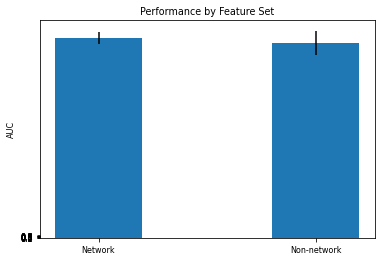

In [5062]:
N = 2
menMeans = (m1, m2)
#womenMeans = (25, 32, 34, 20, 25)
menStd = (s1, s2)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
#p2 = plt.bar(ind, womenMeans, width,
             #bottom=menMeans, yerr=womenStd)

plt.ylabel('AUC')
plt.title('Performance by Feature Set')
plt.xticks(ind, ('Network', 'Non-network'))
plt.yticks(np.arange(0, 1, 0.1))
#plt.legend([p1[0]], ['Men'])

plt.savefig('net_vs_nonnet.png')
#plt.show()

In [492]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [482]:
m1 = statistics.mean(nonnet_black)
m2 = statistics.mean(net_black)

In [483]:
m3 = statistics.mean(nonnet_red)
m4 = statistics.mean(net_red)

In [484]:
m5 = statistics.mean(nonnet_orange)
m6 = statistics.mean(net_orange)

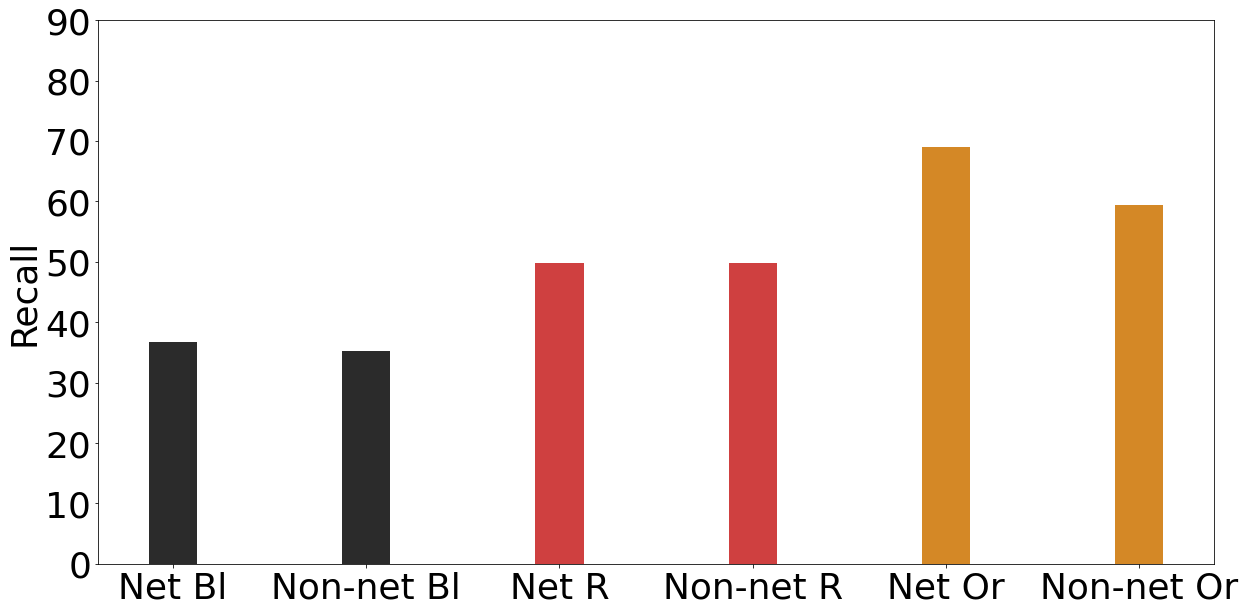

In [1507]:
N = 6
mini = 0
menMeans = (m1*100-mini, m2*100-mini, m3*100-mini, m4*100-mini, m5*100-mini, m6*100-mini)
#womenMeans = (25, 32, 34, 20, 25)
menStd = (0,0,0,0,0,0)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

plt.rcParams.update({'font.size': 36})
plt.figure(figsize=(20,10))

p1 = plt.bar(ind, menMeans, width, yerr=menStd, color=('#2b2b2b', '#2b2b2b', '#cf4040', '#cf4040', '#d48826', '#d48826'))
#p2 = plt.bar(ind, womenMeans, width,
             #bottom=menMeans, yerr=womenStd)
    
plt.ylabel('Recall')
#plt.title('Performance by Feature Set and Color')
plt.xticks(ind, ('Net Bl', 'Non-net Bl', 'Net R', 'Non-net R', 'Net Or', 'Non-net Or'))
plt.yticks(np.arange(mini, 100, 10))
plt.ylim(ymin=mini)

plt.savefig('net-vs-nonnet-colors.png')
#plt.show()

In [1511]:
source_importances = [0,0,0,0,0]
for i in range(0, len(source_importances)):
    source_importances[i] = (network_importances_2a[i]+network_importances_3a[i]+network_importances_4a[i]+network_importances_5a[i]+network_importances_6a[i]+network_importances_7a[i]+network_importances_8a[i]+network_importances_9a[i]+network_importances_10a[i])
    source_importances[i] /= 9
print(source_importances)

[0.009240400421577581, 0.011114653170239226, 0.04627890937690978, 0.46723068644981236, 0.46613535058146094]


In [1517]:
user_importances = [0] * len(user_importances_2a)
for i in range(0, len(user_importances)):
    user_importances[i] = (user_importances_2a[i]+user_importances_3a[i]+user_importances_4a[i]+user_importances_5a[i]+user_importances_6a[i]+user_importances_7a[i]+user_importances_8a[i]+user_importances_9a[i]+user_importances_10a[i])
    user_importances[i] /= 9
print(user_importances)

[0.03277744394948321, 0.08903727418442614, 0.028658517597971653, 0.02675129063568876, 0.04922419455406635, 0.0912240633355404, 0.051588853503778884, 0.05830959882773718, 0.06839965905349538, 0.03231091664667289, 0.09842592409041011, 0.11587506664608832, 0.06896253646090346, 0.18845466051373727]


In [1515]:
source_params

['fake_neighbors', 'neighbors', 'source_score', 'k_nearest', 'lpa_label']

In [1516]:
user_params

['state',
 'age',
 'party',
 'folls',
 'friends',
 'exposures',
 'shares',
 'super_s',
 'super_c',
 'user_score',
 'or_aff',
 'red_aff',
 'bl_aff',
 'fraction_bad']

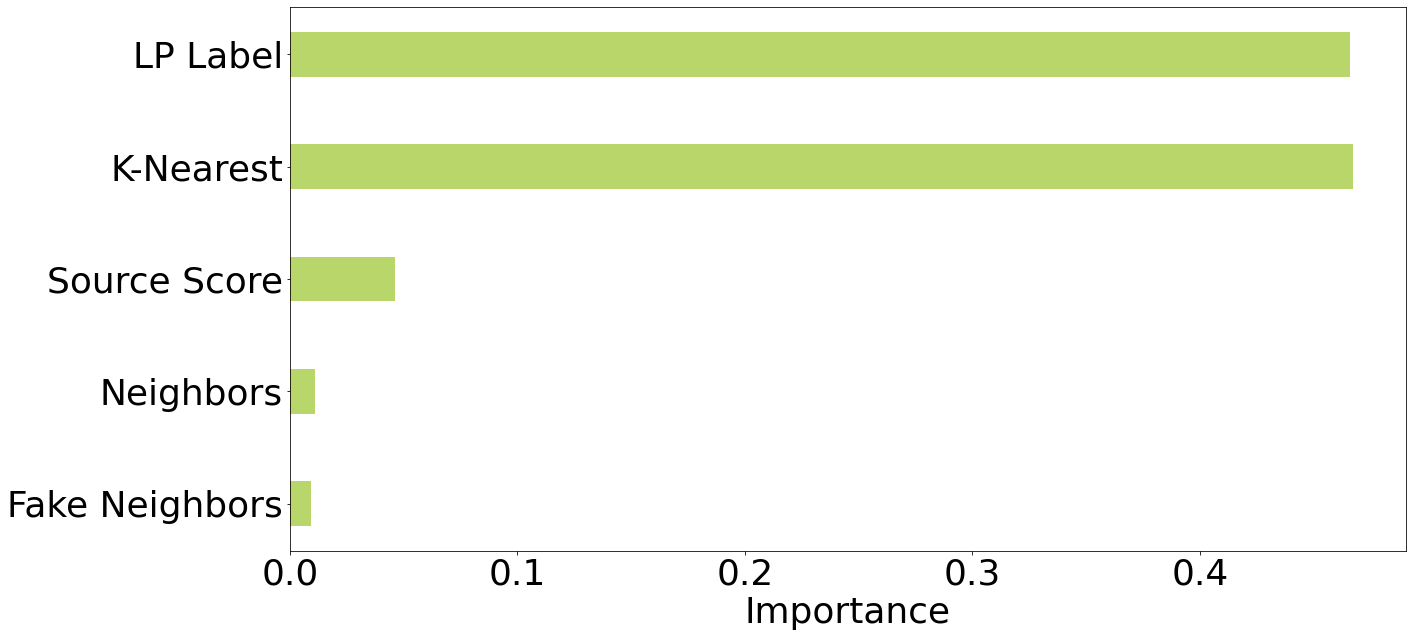

In [1532]:
N = 5
mini = 0
menMeans = source_importances
#womenMeans = (25, 32, 34, 20, 25)
menStd = (0,0,0,0,0,0)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

plt.rcParams.update({'font.size': 36})
plt.figure(figsize=(20,10))

p1 = plt.barh(ind, menMeans, width, color=('#b9d66b'))
#p2 = plt.bar(ind, womenMeans, width,
             #bottom=menMeans, yerr=womenStd)
    
plt.xlabel('Importance')
plt.yticks(ind, ('Fake Neighbors', 'Neighbors', 'Source Score', 'K-Nearest', 'LP Label'))
plt.xticks(np.arange(mini, 0.5, 0.1))
plt.xlim(xmin=mini)

plt.savefig('source-features.png')
#plt.show()

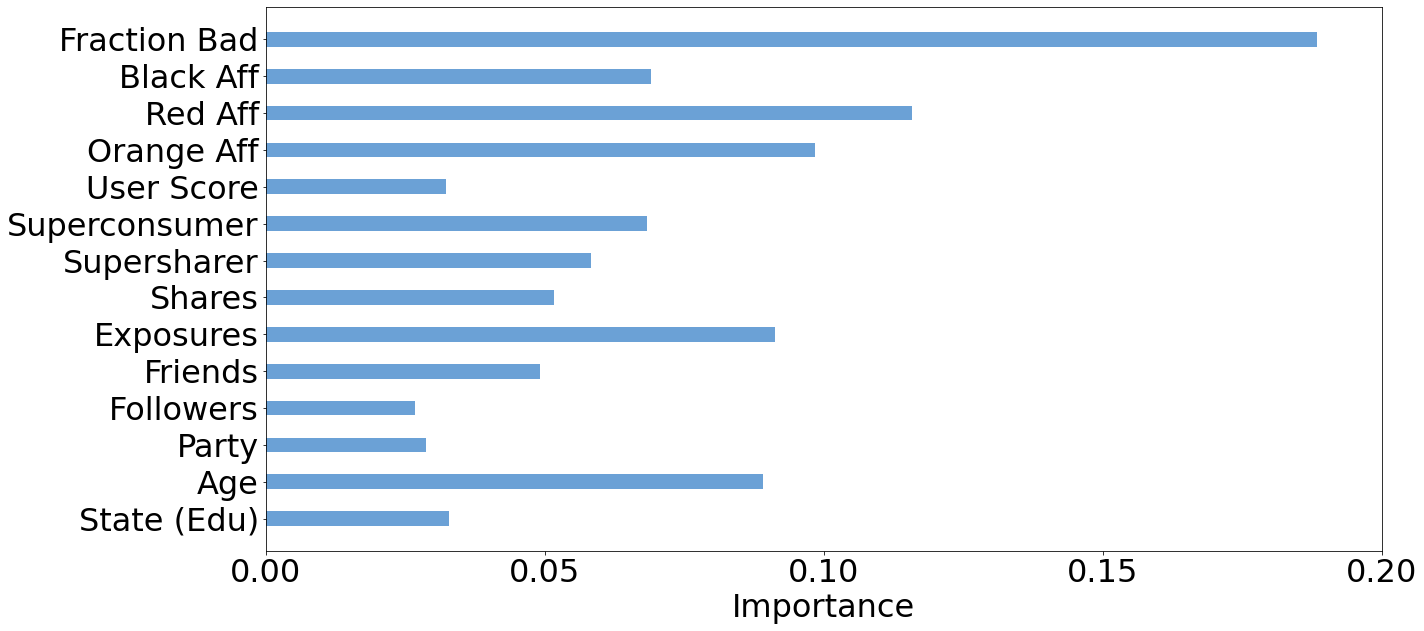

In [1539]:
N = 14
mini = 0
menMeans = user_importances
#womenMeans = (25, 32, 34, 20, 25)
menStd = (0,0,0,0,0,0)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

plt.rcParams.update({'font.size': 32})
plt.figure(figsize=(20,10))

p1 = plt.barh(ind, menMeans, width, color=('#6ba1d6'))
#p2 = plt.bar(ind, womenMeans, width,
             #bottom=menMeans, yerr=womenStd)
    
plt.xlabel('Importance')
plt.yticks(ind, ('State (Edu)', 'Age', 'Party', 'Followers', 'Friends', 'Exposures', 'Shares', 'Supersharer',
                'Superconsumer', 'User Score', 'Orange Aff', 'Red Aff', 'Black Aff', 'Fraction Bad'))
plt.xticks(np.arange(mini, 0.25, 0.05))
plt.xlim(xmin=mini)

plt.savefig('user-features.png')
#plt.show()

In [3428]:
rob = 0
gy = 0
for d in color_labels:
    if (color_labels[d] not in ['GY', '']):
        rob += 1
    if (color_labels[d] in ['GY']):
        gy += 1
print(gy/(rob+gy))

0.8049267643142477


In [3192]:
import statistics

In [2153]:
log_reg_auc_scores = [79.18, 76.64, 75.95, 79.14, 74.63, 79.39, 76.15, 73.80, 70.15, 76.34]

In [2154]:
log_reg_auc_scores2 = [79.30, 73.96, 85.10, 80.08, 76.80, 79.91, 83.14, 78.98, 81.37, 75.21]

In [3194]:
print(statistics.mean(log_reg_auc_scores2))
print(statistics.stdev(log_reg_auc_scores2))

79.38499999999999
3.4184930078097944


In [3435]:
log_reg_f1_scores = [66.3, 65.2, 61.8, 65.2, 65.5, 67.5, 61.9, 63.0, 63.4, 65.0]

In [3450]:
log_reg_accuracy = [85.9, 89.1, 87.5, 89.6, 87.2, 87.4, 87.5, 88.1, 84.2, 87.8]

In [3965]:
print(statistics.mean(log_reg_accuracy))
print(statistics.mean(log_reg_auc_scores))
print(statistics.mean(log_reg_f1_scores))
print(statistics.stdev(log_reg_accuracy))
print(statistics.stdev(log_reg_auc_scores))

87.43
76.137
64.48
1.5246493221575725
2.84343317526933


In [3441]:
online_lpa_f1 = [64.7, 54.7, 57.3, 63.9, 64.7, 65.9, 64.4, 63.1, 63.0, 63.9]
online_lpa_auc = [78.6, 80.5, 80.9, 78.2, 78.6, 78.8, 75.4, 77.9, 78.4, 78.2]
online_lpa_accuracy = [86.3, 85.6, 86.0, 86.0, 86.3, 86.5, 84.5, 85.8, 86.0, 86.0]

In [3443]:
rand_forest_f1 = [56.7, 66.3,  59.0, 55.4,  59.0, 55.4,  57.7, 54.2,  59.0, 55.4,  60.0, 57.8,  56.3, 48.2,  56.7, 66.3,  56.7, 66.3  , 60.2, 63.9]
rand_forest_auc = [78.2, 73.9, 73.9, 73.2, 73.9, 75.2, 70.4, 78.2, 78.2, 77.8]
rand_forest_acc = [86.2, 86.4, 86.4, 86.0, 86.4, 86.8, 85.4, 86.2, 86.2, 87.2]

In [3964]:
print(statistics.mean(rand_forest_f1))
print(statistics.mean(rand_forest_acc))
print(statistics.mean(rand_forest_auc))
print(statistics.stdev(rand_forest_acc))
print(statistics.stdev(rand_forest_auc))

58.525
86.32000000000001
75.29
0.4732863826479684
2.7036806188765863


In [3963]:
print(statistics.mean(online_lpa_accuracy))
print(statistics.mean(online_lpa_auc))
print(statistics.mean(online_lpa_f1))
print(statistics.stdev(online_lpa_accuracy))
print(statistics.stdev(online_lpa_auc))

85.9
78.55
62.56
0.5557777333511021
1.490898312353252


In [ ]:
lpa rslts: [66.1, 87.8, 81.8]

In [1347]:
lpa_acc = [80.4, 81.0, 84.7, 86.5, 86.1, 87.4, 85.6, 86.1, 86.9]
lpa_auc = [72.0, 72.2, 76.5, 78.2, 77.3, 80.4, 75.9, 78.4, 81.0]

In [1496]:
print(statistics.mean(lpa_acc), statistics.stdev(lpa_acc), statistics.mean(lpa_auc), statistics.stdev(lpa_auc))

84.96666666666667 2.540669203182499 76.87777777777778 3.1704801599197


In [1351]:
rf_acc = [84.3, 82.2, 88.7, 90.4, 88.7, 91.6, 87.4, 87.4, 90.6, 91.5]
rf_auc = [79.7, 82.4, 85.6, 80.7, 87.4, 83.9, 77.2, 72.5, 83.0, 81.6]

In [1495]:
print(statistics.mean(rf_acc), statistics.stdev(rf_acc), statistics.mean(rf_auc), statistics.stdev(rf_auc))

88.28 3.090774803975353 81.4 4.2651038804595505


In [1492]:
cs_acc = [81.0, 78.3, 77.9, 83.6, 81.9, 81.4, 84.5, 81.4, 81.9]
cs_auc = [71.8, 66.8, 63.1, 71.0, 70.8, 69.0, 73.9, 71.6, 70.8, 69.1]

In [1494]:
print(statistics.mean(cs_acc), statistics.stdev(cs_acc), statistics.mean(cs_auc), statistics.stdev(cs_auc))

81.32222222222222 2.1481257980957356 69.78999999999999 3.0278154941585638


In [1357]:
gy = 0
for k in color_labels:
    if (color_labels[k] == 'GY'):
        gy += 1
print(gy, len(color_labels), gy/len(color_labels))

1209 1509 0.8011928429423459


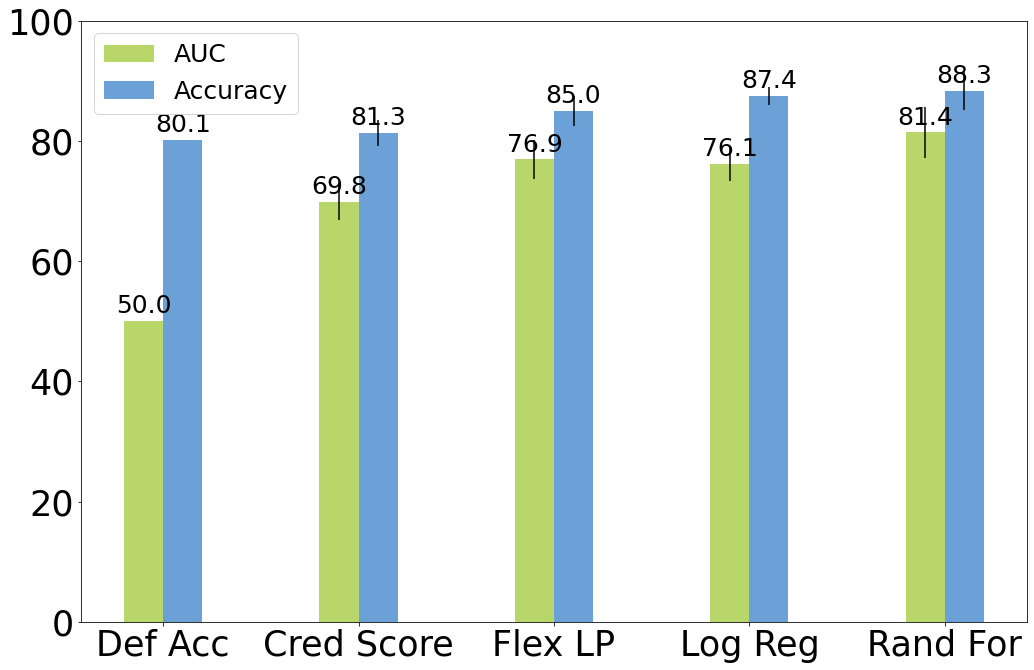

In [1505]:
#auc presents the fairest picture of our model, so I'm redoing all these calculations, auc-style
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#labels = ['Baseline', 'SPR', 'PPR', 'Cred Score', 'Log Reg', 'Rand Forest', 'LPA']
#women_means = [73, 50.5, 51.1 , 90.1, 70.1, 87.0, 90.2]
#men_means = [0, 37.0, 39.0 , 64.0, 50.6, 63.0, 75.8]

labels = ['Def Acc', 'Cred Score', 'Flex LP', 'Log Reg', 'Rand For']
women_means = [80.1, 81.3, 85.0, 87.4, 88.3] #accuracy
men_means = [50, 69.8, 76.9, 76.1, 81.4]#auc
#agender_means = [0, 13.0, 52.3, 67.4, 76.1, 79.3]
stdevs_acc = [0, 2.1, 2.5, 1.5, 3.1] #stdevs
stdevs_auc = [0, 3.0, 3.2, 2.8, 4.3] #stdevs

#NOT RAND FOREST BUT SVM!

#precision: 0.7288135593220338 recall: 0.7962962962962963 f1: 0.7610619469026549 accuracy: 0.9154078549848943
#f1: 0.7931034482758621 accuracy: 0.9244712990936556
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, men_means, width, color='#b9d66b', label='AUC', yerr=stdevs_auc)
rects2 = ax.bar(x + width/2, women_means, width, color='#6ba1d6', label='Accuracy', yerr=stdevs_acc)

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
#ax.text(fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    size = 25,
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.figure(figsize=(15,10))

plt.ylim(top=100)
plt.legend(loc='upper left', prop={'size': 25})

plt.savefig('updated-rslts.png')
#plt.show()

In [1543]:
rf_prec = [58.7, 45.2, 63.6, 74.5, 58.6, 75.5, 64.0, 67.6, 75.5, 86.4]
rf_rec = [65.5, 71.2, 50, 61.5, 72.5, 85.4, 66.0, 80.8, 82.6, 72.1]
print(statistics.mean(rf_prec), statistics.mean(rf_rec))

66.96000000000001 70.76


In [1544]:
2* 66.96 * 70.76 /(66.96 + 70.76)

68.80757478942783

In [1546]:
lp_prec = [84.9, 71.6, 67.7, 61.0, 71.1, 61.2, 65.8, 62.4, 51.5, 52.8]
lp_rec = [63.9, 62.4, 53.0, 61.0, 62.1, 75.9, 61.0, 73.1, 77.0, 71.3]
print(statistics.mean(lp_prec), statistics.mean(lp_rec))

65.0 66.07


In [1547]:
2 * 65 * 66.07 / (65 + 66.07)

65.5306324864576

In [1549]:
lr_prec = [65.8, 58.4, 80, 68.4, 59.8, 69.3, 73.2, 65.2, 69.2, 56.7, 63.0, 73.1]
lr_rec = [62.7, 50, 54.7, 59.1, 66.7, 55.9, 62.7, 65.9, 61.6, 67.9, 67.4, 60.6]
print(statistics.mean(lr_prec), statistics.mean(lr_rec))

66.84166666666667 61.266666666666666


In [1550]:
2* 66.8*61.3 / (66.8+61.3)

63.93192818110851

No handles with labels found to put in legend.


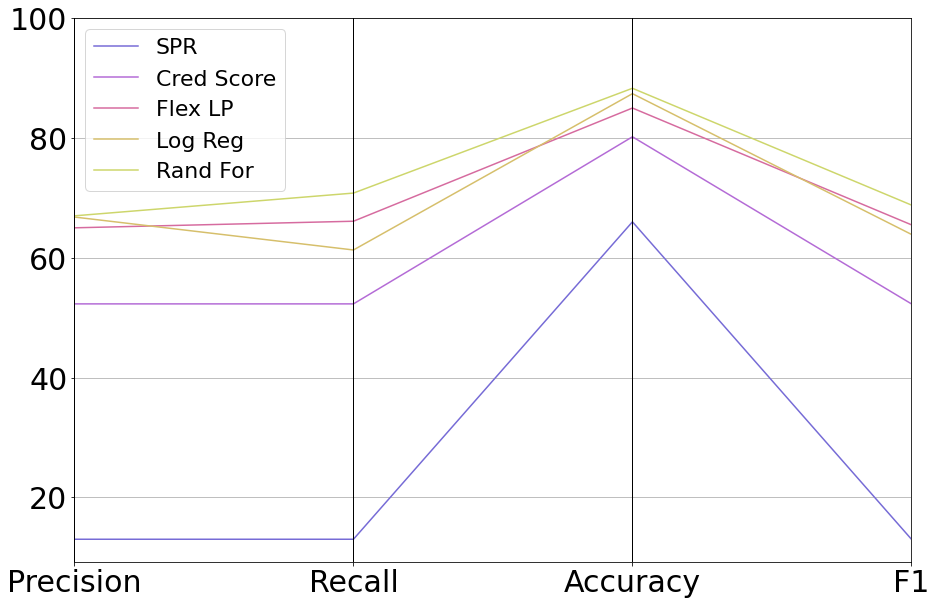

In [1563]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

#plt.figure(figsize=(15,10))
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.legend()

#["PPR",29.9,55.9,51.1,39.0],
#df = pd.DataFrame([["SPR",28.3,52.2,50.5,37.0],["Cred Score",74.7,86,90.1,64.0],["Log Reg",35.2,90.9,70.1,50.6],["Rand Forest",69.4,61.8,87.0,63.0],["LPA",75.6,76.7,90.2,75.8]], 
                  #columns=["element","Precision","Recall","Accuracy", "F1"])
df = pd.DataFrame([["SPR",13.0,13.0,66.0,13.0],["Cred Score",52.3,52.3,80.2,52.3],["Flex LP",65.0,66.1,85.0,65.5],["Log Reg",66.8,61.3,87.4,63.9],["Rand For",67,70.8,88.3,68.8]], 
                  columns=["element","Precision","Recall","Accuracy", "F1"])

#precision: 0.7419354838709677 recall: 0.8518518518518519 f1: 0.7931034482758621 accuracy: 0.9244712990936556

parallel_coordinates(df,"element",color=('#766bd6', '#b46bd6', '#d66b9f', '#d6bf6b', '#cdd66b')) #'#6ba4d6'

plt.ylim(top=100)
plt.legend(loc='upper left', prop={'size': 22})

plt.savefig('results-summary2.png')
#plt.show()